In [1]:
import gym
from stable_baselines3 import PPO
import torch
import numpy as np
from imitation.algorithms import bc
from utilsMW.dataLoaderMW import TorchDatasetMWToy

import numpy as np

from stable_baselines3.common.policies import ActorCriticPolicy

from searchTest.utils import MyEnv, ToyExpertModel, sample_expert_transitions, benchmark_policy
path_train = '/home/hendrik/Documents/master_project/LokalData/metaworld/large/train/'
path_validate = '/home/hendrik/Documents/master_project/LokalData/metaworld/large/val/'
train_data = TorchDatasetMWToy(path=path_train, device='cpu')
val_data = TorchDatasetMWToy(path=path_validate, device='cpu')
print(train_data.data.shape)
print(train_data.label.shape)
MyEnv.set_train_data(train_data, tol_neg=-0.15, tol_pos=0.05, window=9, show_step=True)
ToyExpertModel.set_datasets(train_data=train_data, val_data=val_data)
train_env = MyEnv()
val_env = MyEnv(data=val_data)
my_expert = ToyExpertModel(train_data=train_data, env=train_env)

/home/hendrik/anaconda3/envs/sb/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-07-08 05:02:37.646701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/hendrik/Documents/master_project/CoppeliaSim_Player_V4_1_0_Ubuntu20_04:/home/hendrik/.mujoco/mujoco200/bin
2022-07-08 05:02:37.646716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


torch.Size([10000, 1, 4])
torch.Size([10000, 200, 4])
obs: 16
action_dim: 4
obs: 16
action_dim: 4
obs: 16
action_dim: 4


/home/hendrik/anaconda3/envs/sb/lib/python3.7/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float64
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [2]:
train_env.reset_envs_sampled()

In [3]:
len(train_env.step(np.array([0,0,0,0]))[0])

16

In [4]:
transitions = sample_expert_transitions(my_expert, train_env, n_episodes=100)

Sampling expert transitions.


In [5]:
len(transitions)

20000

In [6]:
policy = ActorCriticPolicy(observation_space=train_env.observation_space, action_space=train_env.action_space, lr_schedule=lambda _: torch.finfo(torch.float32).max, net_arch = [dict(pi=[200, 200, 200], vf=[200, 200, 200])])

In [7]:
bc_trainer = bc.BC(
    observation_space=train_env.observation_space,
    action_space=train_env.action_space,
    expert_data=transitions,
)

In [8]:
MyEnv.show_step = False

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC trainer test large dont show steps/train/


2022-07-08 05:02:48.854857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 05:02:48.855819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/hendrik/Documents/master_project/CoppeliaSim_Player_V4_1_0_Ubuntu20_04:/home/hendrik/.mujoco/mujoco200/bin
2022-07-08 05:02:48.855868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/hendrik/Documents/master_project/CoppeliaSim_Player_V4_1_0_Ubuntu20_04:/home/hendrik/.mujoco/mujoco200/bin
2022-07-08 05:02:48.855912: W tensorflow/stream_executor/pla

----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00526 |
| entropy       | 5.26     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 50.9     |
| loss          | 3.4      |
| n_updates     | 100      |
| neglogp       | 3.4      |
| prob_true_act | 0.0338   |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00485 |
| entropy       | 4.85     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 52       |
| loss          | 2.88     |
| n_updates     | 200      |
| neglogp       | 2.89     |
| prob_true_act | 0.0558   |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00444 |
| entropy       | 4.44     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 53.7     |
| loss          | 2.48     |
| n_updates     | 300      |
| neglogp       | 2.49     |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:01<03:16,  1.99s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00281 |
| entropy       | 2.81     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 53       |
| loss          | 0.879    |
| n_updates     | 700      |
| neglogp       | 0.882    |
| prob_true_act | 0.425    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00241 |
| entropy       | 2.41     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 52.9     |
| loss          | 0.493    |
| n_updates     | 800      |
| neglogp       | 0.496    |
| prob_true_act | 0.635    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00202 |
| entropy       | 2.02     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 53       |
| loss          | 0.0705   |
| n_updates     | 900      |
| neglogp       | 0.0725   |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:04<03:17,  2.02s/it]

-----------------------------
| batch_size    | 32        |
| ent_loss      | -0.000458 |
| entropy       | 0.458     |
| epoch_num     | 2         |
| l2_loss       | 0         |
| l2_norm       | 54.1      |
| loss          | -1.52     |
| n_updates     | 1300      |
| neglogp       | -1.52     |
| prob_true_act | 4.56      |
-----------------------------
-----------------------------
| batch_size    | 32        |
| ent_loss      | -7.73e-05 |
| entropy       | 0.0773    |
| epoch_num     | 2         |
| l2_loss       | 0         |
| l2_norm       | 54.7      |
| loss          | -1.62     |
| n_updates     | 1400      |
| neglogp       | -1.62     |
| prob_true_act | 6.16      |
-----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.000304 |
| entropy       | -0.304   |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 55.4     |
| loss          | -2.25    |
| n_updates     | 1500     |
| neglogp       | -

BC epoch:   3%|▎         | 3/100 [00:06<03:14,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00172  |
| entropy       | -1.72    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 57.9     |
| loss          | -2.04    |
| n_updates     | 1900     |
| neglogp       | -2.05    |
| prob_true_act | 34.2     |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00205  |
| entropy       | -2.05    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 58.5     |
| loss          | -3.89    |
| n_updates     | 2000     |
| neglogp       | -3.89    |
| prob_true_act | 50.3     |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00235  |
| entropy       | -2.35    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 59.2     |
| loss          | -3.53    |
| n_updates     | 2100     |
| neglogp       | -3.53    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:07<03:09,  1.97s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00364  |
| entropy       | -3.64    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 62.1     |
| loss          | -5.38    |
| n_updates     | 2600     |
| neglogp       | -5.38    |
| prob_true_act | 225      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00379  |
| entropy       | -3.79    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 62.8     |
| loss          | -5.67    |
| n_updates     | 2700     |
| neglogp       | -5.67    |
| prob_true_act | 294      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00393  |
| entropy       | -3.93    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 63.1     |
| loss          | -5.7     |
| n_updates     | 2800     |
| neglogp       | -5.7     |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:09<03:06,  1.97s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00429  |
| entropy       | -4.29    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 64.1     |
| loss          | -5.83    |
| n_updates     | 3200     |
| neglogp       | -5.83    |
| prob_true_act | 409      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00435  |
| entropy       | -4.35    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 64.5     |
| loss          | -4.05    |
| n_updates     | 3300     |
| neglogp       | -4.05    |
| prob_true_act | 440      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00443  |
| entropy       | -4.43    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 64.6     |
| loss          | -6.14    |
| n_updates     | 3400     |
| neglogp       | -6.14    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:11<03:03,  1.95s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00457  |
| entropy       | -4.57    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 65.2     |
| loss          | -6.33    |
| n_updates     | 3800     |
| neglogp       | -6.33    |
| prob_true_act | 587      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00461  |
| entropy       | -4.61    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 65.3     |
| loss          | -6.33    |
| n_updates     | 3900     |
| neglogp       | -6.34    |
| prob_true_act | 584      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00463  |
| entropy       | -4.63    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 65.4     |
| loss          | -6.07    |
| n_updates     | 4000     |
| neglogp       | -6.08    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:13<02:59,  1.93s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00474  |
| entropy       | -4.74    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 65.9     |
| loss          | -4.25    |
| n_updates     | 4400     |
| neglogp       | -4.25    |
| prob_true_act | 656      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00472  |
| entropy       | -4.72    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 65.8     |
| loss          | -3.67    |
| n_updates     | 4500     |
| neglogp       | -3.67    |
| prob_true_act | 641      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00474  |
| entropy       | -4.74    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 65.9     |
| loss          | -6.57    |
| n_updates     | 4600     |
| neglogp       | -6.57    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:15<02:58,  1.94s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00483  |
| entropy       | -4.83    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 66.5     |
| loss          | -1.83    |
| n_updates     | 5100     |
| neglogp       | -1.84    |
| prob_true_act | 716      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00484  |
| entropy       | -4.84    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 66.5     |
| loss          | -4.74    |
| n_updates     | 5200     |
| neglogp       | -4.75    |
| prob_true_act | 767      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00483  |
| entropy       | -4.83    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 66.6     |
| loss          | -3.79    |
| n_updates     | 5300     |
| neglogp       | -3.79    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:17<02:58,  1.96s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00484  |
| entropy       | -4.84    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 66.7     |
| loss          | -2.15    |
| n_updates     | 5700     |
| neglogp       | -2.16    |
| prob_true_act | 762      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00485  |
| entropy       | -4.85    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 66.9     |
| loss          | -6.68    |
| n_updates     | 5800     |
| neglogp       | -6.69    |
| prob_true_act | 832      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00486  |
| entropy       | -4.86    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 66.9     |
| loss          | -6.34    |
| n_updates     | 5900     |
| neglogp       | -6.34    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:19<03:00,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00486  |
| entropy       | -4.86    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 67.1     |
| loss          | -1.12    |
| n_updates     | 6300     |
| neglogp       | -1.12    |
| prob_true_act | 687      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00487  |
| entropy       | -4.87    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 67.1     |
| loss          | -3.99    |
| n_updates     | 6400     |
| neglogp       | -4       |
| prob_true_act | 798      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00487  |
| entropy       | -4.87    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 67.2     |
| loss          | -6.67    |
| n_updates     | 6500     |
| neglogp       | -6.67    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:21<03:02,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00488  |
| entropy       | -4.88    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 67.4     |
| loss          | -4.29    |
| n_updates     | 6900     |
| neglogp       | -4.3     |
| prob_true_act | 831      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00488  |
| entropy       | -4.88    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 67.4     |
| loss          | -1.65    |
| n_updates     | 7000     |
| neglogp       | -1.66    |
| prob_true_act | 682      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00488  |
| entropy       | -4.88    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 67.6     |
| loss          | -6.59    |
| n_updates     | 7100     |
| neglogp       | -6.59    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:24<03:02,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00491  |
| entropy       | -4.91    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 67.8     |
| loss          | 3.33     |
| n_updates     | 7600     |
| neglogp       | 3.32     |
| prob_true_act | 742      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00491  |
| entropy       | -4.91    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 67.8     |
| loss          | -1.66    |
| n_updates     | 7700     |
| neglogp       | -1.67    |
| prob_true_act | 835      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00492  |
| entropy       | -4.92    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 67.8     |
| loss          | -6.46    |
| n_updates     | 7800     |
| neglogp       | -6.47    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:26<03:01,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00492  |
| entropy       | -4.92    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 68.1     |
| loss          | -6.52    |
| n_updates     | 8200     |
| neglogp       | -6.53    |
| prob_true_act | 785      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 68.2     |
| loss          | -4.44    |
| n_updates     | 8300     |
| neglogp       | -4.45    |
| prob_true_act | 758      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 68.2     |
| loss          | -1.19    |
| n_updates     | 8400     |
| neglogp       | -1.19    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [00:28<02:59,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00492  |
| entropy       | -4.92    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 68.4     |
| loss          | -3.89    |
| n_updates     | 8800     |
| neglogp       | -3.9     |
| prob_true_act | 807      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 68.5     |
| loss          | -6.72    |
| n_updates     | 8900     |
| neglogp       | -6.73    |
| prob_true_act | 891      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 68.5     |
| loss          | -6.67    |
| n_updates     | 9000     |
| neglogp       | -6.67    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [00:30<02:58,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 68.7     |
| loss          | -6.75    |
| n_updates     | 9400     |
| neglogp       | -6.76    |
| prob_true_act | 887      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 68.8     |
| loss          | -6.47    |
| n_updates     | 9500     |
| neglogp       | -6.48    |
| prob_true_act | 753      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00492  |
| entropy       | -4.92    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 68.8     |
| loss          | -6.55    |
| n_updates     | 9600     |
| neglogp       | -6.55    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [00:32<02:55,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00491  |
| entropy       | -4.91    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 68.9     |
| loss          | -6.35    |
| n_updates     | 10100    |
| neglogp       | -6.36    |
| prob_true_act | 719      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 69.1     |
| loss          | -6.79    |
| n_updates     | 10200    |
| neglogp       | -6.8     |
| prob_true_act | 908      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00491  |
| entropy       | -4.91    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 69       |
| loss          | -4.22    |
| n_updates     | 10300    |
| neglogp       | -4.22    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [00:34<02:55,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 69.3     |
| loss          | -6.56    |
| n_updates     | 10700    |
| neglogp       | -6.56    |
| prob_true_act | 812      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 69.4     |
| loss          | -4.45    |
| n_updates     | 10800    |
| neglogp       | -4.45    |
| prob_true_act | 814      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00496  |
| entropy       | -4.96    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 69.5     |
| loss          | -6.87    |
| n_updates     | 10900    |
| neglogp       | -6.88    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [00:36<02:53,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 69.7     |
| loss          | -4.08    |
| n_updates     | 11300    |
| neglogp       | -4.09    |
| prob_true_act | 809      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 69.8     |
| loss          | -6.55    |
| n_updates     | 11400    |
| neglogp       | -6.56    |
| prob_true_act | 843      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 69.8     |
| loss          | -6.75    |
| n_updates     | 11500    |
| neglogp       | -6.76    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [00:38<02:52,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 70       |
| loss          | -6.74    |
| n_updates     | 11900    |
| neglogp       | -6.74    |
| prob_true_act | 879      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 70.1     |
| loss          | -6.75    |
| n_updates     | 12000    |
| neglogp       | -6.76    |
| prob_true_act | 897      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00493  |
| entropy       | -4.93    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 70.1     |
| loss          | -4.54    |
| n_updates     | 12100    |
| neglogp       | -4.54    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [00:41<02:50,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00497  |
| entropy       | -4.97    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 70.5     |
| loss          | -2.46    |
| n_updates     | 12600    |
| neglogp       | -2.46    |
| prob_true_act | 850      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00496  |
| entropy       | -4.96    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 70.6     |
| loss          | -6.42    |
| n_updates     | 12700    |
| neglogp       | -6.43    |
| prob_true_act | 759      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00491  |
| entropy       | -4.91    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 70.6     |
| loss          | 0.389    |
| n_updates     | 12800    |
| neglogp       | 0.384    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [00:43<02:46,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00497  |
| entropy       | -4.97    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 70.9     |
| loss          | -3.91    |
| n_updates     | 13200    |
| neglogp       | -3.92    |
| prob_true_act | 864      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00498  |
| entropy       | -4.98    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 70.9     |
| loss          | -6.84    |
| n_updates     | 13300    |
| neglogp       | -6.84    |
| prob_true_act | 954      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00497  |
| entropy       | -4.97    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 71.1     |
| loss          | -6.66    |
| n_updates     | 13400    |
| neglogp       | -6.67    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [00:45<02:44,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 71.1     |
| loss          | -1.88    |
| n_updates     | 13800    |
| neglogp       | -1.88    |
| prob_true_act | 776      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00499  |
| entropy       | -4.99    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 71.2     |
| loss          | -6.7     |
| n_updates     | 13900    |
| neglogp       | -6.7     |
| prob_true_act | 881      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 71.2     |
| loss          | -6.57    |
| n_updates     | 14000    |
| neglogp       | -6.58    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [00:47<02:41,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00497  |
| entropy       | -4.97    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 71.6     |
| loss          | -6.77    |
| n_updates     | 14400    |
| neglogp       | -6.77    |
| prob_true_act | 917      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.005    |
| entropy       | -5       |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 71.8     |
| loss          | 0.83     |
| n_updates     | 14500    |
| neglogp       | 0.825    |
| prob_true_act | 814      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 71.7     |
| loss          | -6.49    |
| n_updates     | 14600    |
| neglogp       | -6.5     |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [00:49<02:39,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 72.1     |
| loss          | -6.68    |
| n_updates     | 15100    |
| neglogp       | -6.68    |
| prob_true_act | 860      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 72.1     |
| loss          | -6.65    |
| n_updates     | 15200    |
| neglogp       | -6.66    |
| prob_true_act | 869      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 72.3     |
| loss          | -6.63    |
| n_updates     | 15300    |
| neglogp       | -6.63    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [00:51<02:37,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 72.5     |
| loss          | -4.51    |
| n_updates     | 15700    |
| neglogp       | -4.52    |
| prob_true_act | 848      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00494  |
| entropy       | -4.94    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 72.6     |
| loss          | -6.66    |
| n_updates     | 15800    |
| neglogp       | -6.67    |
| prob_true_act | 831      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 72.7     |
| loss          | -6.79    |
| n_updates     | 15900    |
| neglogp       | -6.79    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [00:53<02:36,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.005    |
| entropy       | -5       |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 73       |
| loss          | -6.76    |
| n_updates     | 16300    |
| neglogp       | -6.77    |
| prob_true_act | 937      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00497  |
| entropy       | -4.97    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 73       |
| loss          | -6.59    |
| n_updates     | 16400    |
| neglogp       | -6.59    |
| prob_true_act | 844      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.005    |
| entropy       | -5       |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 73.2     |
| loss          | -4.05    |
| n_updates     | 16500    |
| neglogp       | -4.06    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [00:55<02:32,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00498  |
| entropy       | -4.98    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 73.4     |
| loss          | -4.37    |
| n_updates     | 16900    |
| neglogp       | -4.38    |
| prob_true_act | 780      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00497  |
| entropy       | -4.97    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 73.5     |
| loss          | -3.98    |
| n_updates     | 17000    |
| neglogp       | -3.98    |
| prob_true_act | 881      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00495  |
| entropy       | -4.95    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 73.4     |
| loss          | -6.55    |
| n_updates     | 17100    |
| neglogp       | -6.55    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [00:57<02:30,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00498  |
| entropy       | -4.98    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 74       |
| loss          | -4.2     |
| n_updates     | 17600    |
| neglogp       | -4.21    |
| prob_true_act | 848      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 74.3     |
| loss          | -4.32    |
| n_updates     | 17700    |
| neglogp       | -4.33    |
| prob_true_act | 918      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00499  |
| entropy       | -4.99    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 74.2     |
| loss          | -3.98    |
| n_updates     | 17800    |
| neglogp       | -3.99    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [00:59<02:29,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00499  |
| entropy       | -4.99    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 74.6     |
| loss          | -6.66    |
| n_updates     | 18200    |
| neglogp       | -6.66    |
| prob_true_act | 904      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00498  |
| entropy       | -4.98    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 74.7     |
| loss          | -6.78    |
| n_updates     | 18300    |
| neglogp       | -6.79    |
| prob_true_act | 929      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00499  |
| entropy       | -4.99    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 74.7     |
| loss          | -6.84    |
| n_updates     | 18400    |
| neglogp       | -6.85    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [01:01<02:26,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00499  |
| entropy       | -4.99    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 75       |
| loss          | -4.02    |
| n_updates     | 18800    |
| neglogp       | -4.03    |
| prob_true_act | 844      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00498  |
| entropy       | -4.98    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 75.3     |
| loss          | -6.12    |
| n_updates     | 18900    |
| neglogp       | -6.12    |
| prob_true_act | 668      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00499  |
| entropy       | -4.99    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 75.3     |
| loss          | -6.66    |
| n_updates     | 19000    |
| neglogp       | -6.66    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [01:04<02:24,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.005    |
| entropy       | -5       |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 75.6     |
| loss          | -2.75    |
| n_updates     | 19400    |
| neglogp       | -2.75    |
| prob_true_act | 878      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00498  |
| entropy       | -4.98    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 75.8     |
| loss          | -6.78    |
| n_updates     | 19500    |
| neglogp       | -6.78    |
| prob_true_act | 902      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00498  |
| entropy       | -4.98    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 75.8     |
| loss          | -4.25    |
| n_updates     | 19600    |
| neglogp       | -4.26    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [01:06<02:22,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00504  |
| entropy       | -5.04    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 76.3     |
| loss          | -6.78    |
| n_updates     | 20100    |
| neglogp       | -6.78    |
| prob_true_act | 952      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 76.4     |
| loss          | -6.87    |
| n_updates     | 20200    |
| neglogp       | -6.87    |
| prob_true_act | 987      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 76.5     |
| loss          | -6.24    |
| n_updates     | 20300    |
| neglogp       | -6.24    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [01:08<02:22,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 76.8     |
| loss          | -4.81    |
| n_updates     | 20700    |
| neglogp       | -4.81    |
| prob_true_act | 965      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00502  |
| entropy       | -5.02    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 76.8     |
| loss          | -6.84    |
| n_updates     | 20800    |
| neglogp       | -6.85    |
| prob_true_act | 962      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 76.9     |
| loss          | -4.52    |
| n_updates     | 20900    |
| neglogp       | -4.52    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [01:10<02:17,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00502  |
| entropy       | -5.02    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 77.4     |
| loss          | -4.16    |
| n_updates     | 21300    |
| neglogp       | -4.16    |
| prob_true_act | 890      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00502  |
| entropy       | -5.02    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 77.5     |
| loss          | -1.62    |
| n_updates     | 21400    |
| neglogp       | -1.63    |
| prob_true_act | 914      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.005    |
| entropy       | -5       |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 77.5     |
| loss          | -4.73    |
| n_updates     | 21500    |
| neglogp       | -4.73    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [01:12<02:14,  2.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 77.9     |
| loss          | -0.179   |
| n_updates     | 21900    |
| neglogp       | -0.184   |
| prob_true_act | 729      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 77.9     |
| loss          | -6.41    |
| n_updates     | 22000    |
| neglogp       | -6.42    |
| prob_true_act | 745      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 78       |
| loss          | -6.61    |
| n_updates     | 22100    |
| neglogp       | -6.61    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [01:14<02:11,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00505  |
| entropy       | -5.05    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 78.6     |
| loss          | -6.82    |
| n_updates     | 22600    |
| neglogp       | -6.83    |
| prob_true_act | 977      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00505  |
| entropy       | -5.05    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 78.7     |
| loss          | -6.87    |
| n_updates     | 22700    |
| neglogp       | -6.87    |
| prob_true_act | 1.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 78.8     |
| loss          | -6.83    |
| n_updates     | 22800    |
| neglogp       | -6.83    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [01:16<02:08,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00506  |
| entropy       | -5.06    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 79.2     |
| loss          | -6.92    |
| n_updates     | 23200    |
| neglogp       | -6.93    |
| prob_true_act | 1.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00507  |
| entropy       | -5.07    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 79.3     |
| loss          | -1.91    |
| n_updates     | 23300    |
| neglogp       | -1.92    |
| prob_true_act | 972      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00508  |
| entropy       | -5.08    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 79.3     |
| loss          | -2.64    |
| n_updates     | 23400    |
| neglogp       | -2.65    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [01:18<02:06,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00502  |
| entropy       | -5.02    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 79.6     |
| loss          | -6.82    |
| n_updates     | 23800    |
| neglogp       | -6.83    |
| prob_true_act | 947      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 79.7     |
| loss          | -6.7     |
| n_updates     | 23900    |
| neglogp       | -6.7     |
| prob_true_act | 904      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 79.9     |
| loss          | -4.99    |
| n_updates     | 24000    |
| neglogp       | -5       |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [01:20<02:03,  2.03s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 80.1     |
| loss          | -3.81    |
| n_updates     | 24400    |
| neglogp       | -3.82    |
| prob_true_act | 824      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00504  |
| entropy       | -5.04    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 80.2     |
| loss          | -3.99    |
| n_updates     | 24500    |
| neglogp       | -3.99    |
| prob_true_act | 962      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00504  |
| entropy       | -5.04    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 80.4     |
| loss          | -6.81    |
| n_updates     | 24600    |
| neglogp       | -6.81    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [01:22<02:02,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00504  |
| entropy       | -5.04    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 80.9     |
| loss          | -4.68    |
| n_updates     | 25100    |
| neglogp       | -4.69    |
| prob_true_act | 897      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 81       |
| loss          | -4.68    |
| n_updates     | 25200    |
| neglogp       | -4.69    |
| prob_true_act | 913      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00504  |
| entropy       | -5.04    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 81.1     |
| loss          | -4.61    |
| n_updates     | 25300    |
| neglogp       | -4.62    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [01:24<01:59,  2.03s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 81.4     |
| loss          | -6.74    |
| n_updates     | 25700    |
| neglogp       | -6.75    |
| prob_true_act | 942      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 81.5     |
| loss          | -6.66    |
| n_updates     | 25800    |
| neglogp       | -6.67    |
| prob_true_act | 923      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00506  |
| entropy       | -5.06    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 81.7     |
| loss          | -6.65    |
| n_updates     | 25900    |
| neglogp       | -6.66    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [01:26<01:55,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00508  |
| entropy       | -5.08    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 82.1     |
| loss          | -1.77    |
| n_updates     | 26300    |
| neglogp       | -1.77    |
| prob_true_act | 933      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00509  |
| entropy       | -5.09    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 82.1     |
| loss          | -6.85    |
| n_updates     | 26400    |
| neglogp       | -6.85    |
| prob_true_act | 995      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00508  |
| entropy       | -5.08    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 82.2     |
| loss          | -6.78    |
| n_updates     | 26500    |
| neglogp       | -6.78    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [01:28<01:54,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00505  |
| entropy       | -5.05    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 82.6     |
| loss          | -6.87    |
| n_updates     | 26900    |
| neglogp       | -6.88    |
| prob_true_act | 1e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00504  |
| entropy       | -5.04    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 82.6     |
| loss          | -2.4     |
| n_updates     | 27000    |
| neglogp       | -2.41    |
| prob_true_act | 833      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00504  |
| entropy       | -5.04    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 82.7     |
| loss          | -6.59    |
| n_updates     | 27100    |
| neglogp       | -6.6     |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [01:30<01:55,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00507  |
| entropy       | -5.07    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 83.3     |
| loss          | -6.6     |
| n_updates     | 27600    |
| neglogp       | -6.61    |
| prob_true_act | 809      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00505  |
| entropy       | -5.05    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 83.4     |
| loss          | -6.45    |
| n_updates     | 27700    |
| neglogp       | -6.45    |
| prob_true_act | 875      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 83.6     |
| loss          | -6.87    |
| n_updates     | 27800    |
| neglogp       | -6.87    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [01:32<01:54,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00507  |
| entropy       | -5.07    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 84       |
| loss          | -3.8     |
| n_updates     | 28200    |
| neglogp       | -3.81    |
| prob_true_act | 817      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00507  |
| entropy       | -5.07    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 84.1     |
| loss          | -3.46    |
| n_updates     | 28300    |
| neglogp       | -3.47    |
| prob_true_act | 791      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 84.3     |
| loss          | -4.58    |
| n_updates     | 28400    |
| neglogp       | -4.59    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [01:34<01:53,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00506  |
| entropy       | -5.06    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 84.7     |
| loss          | -4.49    |
| n_updates     | 28800    |
| neglogp       | -4.49    |
| prob_true_act | 890      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00506  |
| entropy       | -5.06    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 84.7     |
| loss          | -2.71    |
| n_updates     | 28900    |
| neglogp       | -2.72    |
| prob_true_act | 906      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00507  |
| entropy       | -5.07    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 84.9     |
| loss          | -3.92    |
| n_updates     | 29000    |
| neglogp       | -3.92    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [01:36<01:50,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00508  |
| entropy       | -5.08    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 85.3     |
| loss          | -4.68    |
| n_updates     | 29400    |
| neglogp       | -4.69    |
| prob_true_act | 901      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 85.4     |
| loss          | -2.88    |
| n_updates     | 29500    |
| neglogp       | -2.89    |
| prob_true_act | 982      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00509  |
| entropy       | -5.09    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 85.7     |
| loss          | -6.85    |
| n_updates     | 29600    |
| neglogp       | -6.85    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [01:39<01:48,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00508  |
| entropy       | -5.08    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 86.2     |
| loss          | -3.52    |
| n_updates     | 30100    |
| neglogp       | -3.52    |
| prob_true_act | 810      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00508  |
| entropy       | -5.08    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 86.4     |
| loss          | -6.58    |
| n_updates     | 30200    |
| neglogp       | -6.58    |
| prob_true_act | 968      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00511  |
| entropy       | -5.11    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 86.6     |
| loss          | -1.59    |
| n_updates     | 30300    |
| neglogp       | -1.59    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [01:41<01:47,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00509  |
| entropy       | -5.09    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 86.9     |
| loss          | -4.43    |
| n_updates     | 30700    |
| neglogp       | -4.43    |
| prob_true_act | 897      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 87.1     |
| loss          | -6.96    |
| n_updates     | 30800    |
| neglogp       | -6.97    |
| prob_true_act | 1.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00511  |
| entropy       | -5.11    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 87.3     |
| loss          | -6.5     |
| n_updates     | 30900    |
| neglogp       | -6.5     |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [01:43<01:44,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 87.8     |
| loss          | -4.44    |
| n_updates     | 31300    |
| neglogp       | -4.45    |
| prob_true_act | 978      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00513  |
| entropy       | -5.13    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 88       |
| loss          | -6.7     |
| n_updates     | 31400    |
| neglogp       | -6.7     |
| prob_true_act | 1.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00512  |
| entropy       | -5.12    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 88.1     |
| loss          | -6.69    |
| n_updates     | 31500    |
| neglogp       | -6.7     |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [01:45<01:43,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00512  |
| entropy       | -5.12    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 88.6     |
| loss          | -6.92    |
| n_updates     | 31900    |
| neglogp       | -6.92    |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00513  |
| entropy       | -5.13    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 88.8     |
| loss          | 2.79     |
| n_updates     | 32000    |
| neglogp       | 2.79     |
| prob_true_act | 851      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00512  |
| entropy       | -5.12    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 88.9     |
| loss          | -2.46    |
| n_updates     | 32100    |
| neglogp       | -2.46    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [01:47<01:40,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 89.7     |
| loss          | -0.344   |
| n_updates     | 32600    |
| neglogp       | -0.349   |
| prob_true_act | 855      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00509  |
| entropy       | -5.09    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 89.8     |
| loss          | -6.83    |
| n_updates     | 32700    |
| neglogp       | -6.84    |
| prob_true_act | 995      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00511  |
| entropy       | -5.11    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 90       |
| loss          | -6.83    |
| n_updates     | 32800    |
| neglogp       | -6.84    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [01:49<01:37,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 90.6     |
| loss          | -6.75    |
| n_updates     | 33200    |
| neglogp       | -6.76    |
| prob_true_act | 961      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0051   |
| entropy       | -5.1     |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 90.7     |
| loss          | -6.69    |
| n_updates     | 33300    |
| neglogp       | -6.69    |
| prob_true_act | 972      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00508  |
| entropy       | -5.08    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 90.9     |
| loss          | -6.79    |
| n_updates     | 33400    |
| neglogp       | -6.79    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [01:51<01:36,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00514  |
| entropy       | -5.14    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 91.6     |
| loss          | -4.58    |
| n_updates     | 33800    |
| neglogp       | -4.58    |
| prob_true_act | 980      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00512  |
| entropy       | -5.12    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 91.7     |
| loss          | -6.7     |
| n_updates     | 33900    |
| neglogp       | -6.7     |
| prob_true_act | 965      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00513  |
| entropy       | -5.13    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 91.7     |
| loss          | -3.95    |
| n_updates     | 34000    |
| neglogp       | -3.95    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [01:53<01:34,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00515  |
| entropy       | -5.15    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 92.4     |
| loss          | 0.557    |
| n_updates     | 34400    |
| neglogp       | 0.551    |
| prob_true_act | 926      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00513  |
| entropy       | -5.13    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 92.6     |
| loss          | -6.86    |
| n_updates     | 34500    |
| neglogp       | -6.86    |
| prob_true_act | 1.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00514  |
| entropy       | -5.14    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 92.7     |
| loss          | -3.96    |
| n_updates     | 34600    |
| neglogp       | -3.96    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [01:55<01:32,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00514  |
| entropy       | -5.14    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 93.6     |
| loss          | -4.56    |
| n_updates     | 35100    |
| neglogp       | -4.57    |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00516  |
| entropy       | -5.16    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 93.8     |
| loss          | -4.46    |
| n_updates     | 35200    |
| neglogp       | -4.47    |
| prob_true_act | 1e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00514  |
| entropy       | -5.14    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 94       |
| loss          | -6.96    |
| n_updates     | 35300    |
| neglogp       | -6.97    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [01:57<01:29,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00516  |
| entropy       | -5.16    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 94.5     |
| loss          | -1.87    |
| n_updates     | 35700    |
| neglogp       | -1.88    |
| prob_true_act | 1.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00514  |
| entropy       | -5.14    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 94.8     |
| loss          | -4.11    |
| n_updates     | 35800    |
| neglogp       | -4.12    |
| prob_true_act | 872      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00516  |
| entropy       | -5.16    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 95       |
| loss          | -6.89    |
| n_updates     | 35900    |
| neglogp       | -6.9     |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [01:59<01:27,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00517  |
| entropy       | -5.17    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 95.6     |
| loss          | -6.75    |
| n_updates     | 36300    |
| neglogp       | -6.75    |
| prob_true_act | 1.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00517  |
| entropy       | -5.17    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 95.9     |
| loss          | -4.61    |
| n_updates     | 36400    |
| neglogp       | -4.62    |
| prob_true_act | 1.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00519  |
| entropy       | -5.19    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 96       |
| loss          | -2.4     |
| n_updates     | 36500    |
| neglogp       | -2.41    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [02:02<01:26,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00518  |
| entropy       | -5.18    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 96.9     |
| loss          | -6.51    |
| n_updates     | 36900    |
| neglogp       | -6.52    |
| prob_true_act | 969      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0052   |
| entropy       | -5.2     |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 97.2     |
| loss          | -6.93    |
| n_updates     | 37000    |
| neglogp       | -6.94    |
| prob_true_act | 1.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00518  |
| entropy       | -5.18    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 97.4     |
| loss          | -1.57    |
| n_updates     | 37100    |
| neglogp       | -1.58    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [02:04<01:23,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00522  |
| entropy       | -5.22    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 98.3     |
| loss          | -4.54    |
| n_updates     | 37600    |
| neglogp       | -4.55    |
| prob_true_act | 1.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00521  |
| entropy       | -5.21    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 98.5     |
| loss          | -5.49    |
| n_updates     | 37700    |
| neglogp       | -5.49    |
| prob_true_act | 1.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0052   |
| entropy       | -5.2     |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 98.8     |
| loss          | -6.01    |
| n_updates     | 37800    |
| neglogp       | -6.02    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [02:06<01:21,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00519  |
| entropy       | -5.19    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 99.4     |
| loss          | -6.9     |
| n_updates     | 38200    |
| neglogp       | -6.9     |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00518  |
| entropy       | -5.18    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 99.6     |
| loss          | -6.06    |
| n_updates     | 38300    |
| neglogp       | -6.06    |
| prob_true_act | 982      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00518  |
| entropy       | -5.18    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 100      |
| loss          | -3.73    |
| n_updates     | 38400    |
| neglogp       | -3.73    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [02:08<01:19,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00522  |
| entropy       | -5.22    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 101      |
| loss          | 3.01     |
| n_updates     | 38800    |
| neglogp       | 3.01     |
| prob_true_act | 968      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00521  |
| entropy       | -5.21    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 101      |
| loss          | -4.25    |
| n_updates     | 38900    |
| neglogp       | -4.25    |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00524  |
| entropy       | -5.24    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 101      |
| loss          | -1.58    |
| n_updates     | 39000    |
| neglogp       | -1.59    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [02:10<01:17,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00521  |
| entropy       | -5.21    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 102      |
| loss          | -3.47    |
| n_updates     | 39400    |
| neglogp       | -3.48    |
| prob_true_act | 922      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00523  |
| entropy       | -5.23    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 102      |
| loss          | -6.59    |
| n_updates     | 39500    |
| neglogp       | -6.6     |
| prob_true_act | 1.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00522  |
| entropy       | -5.22    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 102      |
| loss          | -6.98    |
| n_updates     | 39600    |
| neglogp       | -6.99    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [02:12<01:15,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00522  |
| entropy       | -5.22    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 104      |
| loss          | -4.42    |
| n_updates     | 40100    |
| neglogp       | -4.42    |
| prob_true_act | 1.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0052   |
| entropy       | -5.2     |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 104      |
| loss          | -6.84    |
| n_updates     | 40200    |
| neglogp       | -6.85    |
| prob_true_act | 1.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00522  |
| entropy       | -5.22    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 104      |
| loss          | -6.52    |
| n_updates     | 40300    |
| neglogp       | -6.52    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [02:14<01:13,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00521  |
| entropy       | -5.21    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 105      |
| loss          | -4.25    |
| n_updates     | 40700    |
| neglogp       | -4.25    |
| prob_true_act | 1.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00522  |
| entropy       | -5.22    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 105      |
| loss          | -5.53    |
| n_updates     | 40800    |
| neglogp       | -5.54    |
| prob_true_act | 1.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00524  |
| entropy       | -5.24    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 105      |
| loss          | -5.19    |
| n_updates     | 40900    |
| neglogp       | -5.19    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [02:16<01:11,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00522  |
| entropy       | -5.22    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 106      |
| loss          | -6.89    |
| n_updates     | 41300    |
| neglogp       | -6.9     |
| prob_true_act | 1.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00524  |
| entropy       | -5.24    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 106      |
| loss          | -7       |
| n_updates     | 41400    |
| neglogp       | -7.01    |
| prob_true_act | 1.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00525  |
| entropy       | -5.25    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 106      |
| loss          | -5.66    |
| n_updates     | 41500    |
| neglogp       | -5.67    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [02:18<01:09,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00524  |
| entropy       | -5.24    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 107      |
| loss          | -6.61    |
| n_updates     | 41900    |
| neglogp       | -6.61    |
| prob_true_act | 1.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0052   |
| entropy       | -5.2     |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 108      |
| loss          | -5.46    |
| n_updates     | 42000    |
| neglogp       | -5.46    |
| prob_true_act | 946      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00521  |
| entropy       | -5.21    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 108      |
| loss          | -6.91    |
| n_updates     | 42100    |
| neglogp       | -6.92    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [02:21<01:07,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 109      |
| loss          | -6.58    |
| n_updates     | 42600    |
| neglogp       | -6.59    |
| prob_true_act | 1.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0053   |
| entropy       | -5.3     |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 109      |
| loss          | -6.56    |
| n_updates     | 42700    |
| neglogp       | -6.56    |
| prob_true_act | 1.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00533  |
| entropy       | -5.33    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 109      |
| loss          | -2.82    |
| n_updates     | 42800    |
| neglogp       | -2.82    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [02:23<01:06,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00527  |
| entropy       | -5.27    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 110      |
| loss          | -4.14    |
| n_updates     | 43200    |
| neglogp       | -4.15    |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0053   |
| entropy       | -5.3     |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 110      |
| loss          | -3.09    |
| n_updates     | 43300    |
| neglogp       | -3.1     |
| prob_true_act | 1.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00529  |
| entropy       | -5.29    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 110      |
| loss          | -6.72    |
| n_updates     | 43400    |
| neglogp       | -6.73    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [02:25<01:03,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 111      |
| loss          | -6.69    |
| n_updates     | 43800    |
| neglogp       | -6.7     |
| prob_true_act | 1.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00531  |
| entropy       | -5.31    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 111      |
| loss          | -5.47    |
| n_updates     | 43900    |
| neglogp       | -5.48    |
| prob_true_act | 1.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0053   |
| entropy       | -5.3     |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 112      |
| loss          | -6.25    |
| n_updates     | 44000    |
| neglogp       | -6.25    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [02:27<01:01,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0053   |
| entropy       | -5.3     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 112      |
| loss          | -5.21    |
| n_updates     | 44400    |
| neglogp       | -5.21    |
| prob_true_act | 1.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00531  |
| entropy       | -5.31    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 113      |
| loss          | -5.2     |
| n_updates     | 44500    |
| neglogp       | -5.2     |
| prob_true_act | 1.3e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00532  |
| entropy       | -5.32    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 113      |
| loss          | -6.96    |
| n_updates     | 44600    |
| neglogp       | -6.97    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [02:29<00:59,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00531  |
| entropy       | -5.31    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 114      |
| loss          | -2.91    |
| n_updates     | 45100    |
| neglogp       | -2.91    |
| prob_true_act | 1.18e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 114      |
| loss          | -4.5     |
| n_updates     | 45200    |
| neglogp       | -4.5     |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 114      |
| loss          | -7.07    |
| n_updates     | 45300    |
| neglogp       | -7.08    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [02:31<00:57,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00531  |
| entropy       | -5.31    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 115      |
| loss          | -5       |
| n_updates     | 45700    |
| neglogp       | -5       |
| prob_true_act | 1.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00526  |
| entropy       | -5.26    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 115      |
| loss          | -4.96    |
| n_updates     | 45800    |
| neglogp       | -4.97    |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0053   |
| entropy       | -5.3     |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 116      |
| loss          | -6.85    |
| n_updates     | 45900    |
| neglogp       | -6.85    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [02:33<00:54,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00534  |
| entropy       | -5.34    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 116      |
| loss          | -2.91    |
| n_updates     | 46300    |
| neglogp       | -2.91    |
| prob_true_act | 1.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00533  |
| entropy       | -5.33    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 116      |
| loss          | -7.13    |
| n_updates     | 46400    |
| neglogp       | -7.13    |
| prob_true_act | 1.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00535  |
| entropy       | -5.35    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 117      |
| loss          | -6.41    |
| n_updates     | 46500    |
| neglogp       | -6.41    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [02:35<00:52,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00532  |
| entropy       | -5.32    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 118      |
| loss          | -6.88    |
| n_updates     | 46900    |
| neglogp       | -6.89    |
| prob_true_act | 1.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00534  |
| entropy       | -5.34    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 118      |
| loss          | -2.15    |
| n_updates     | 47000    |
| neglogp       | -2.16    |
| prob_true_act | 1.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00532  |
| entropy       | -5.32    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 118      |
| loss          | -4.36    |
| n_updates     | 47100    |
| neglogp       | -4.37    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [02:37<00:49,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00534  |
| entropy       | -5.34    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 119      |
| loss          | -6.59    |
| n_updates     | 47600    |
| neglogp       | -6.59    |
| prob_true_act | 1.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00535  |
| entropy       | -5.35    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 119      |
| loss          | -7.09    |
| n_updates     | 47700    |
| neglogp       | -7.1     |
| prob_true_act | 1.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00536  |
| entropy       | -5.36    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 119      |
| loss          | -3.17    |
| n_updates     | 47800    |
| neglogp       | -3.17    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [02:39<00:47,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0054   |
| entropy       | -5.4     |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 120      |
| loss          | -4.38    |
| n_updates     | 48200    |
| neglogp       | -4.38    |
| prob_true_act | 1.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0054   |
| entropy       | -5.4     |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 120      |
| loss          | -2.42    |
| n_updates     | 48300    |
| neglogp       | -2.43    |
| prob_true_act | 1.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0054   |
| entropy       | -5.4     |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 121      |
| loss          | -0.584   |
| n_updates     | 48400    |
| neglogp       | -0.589   |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [02:41<00:45,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00537  |
| entropy       | -5.37    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 121      |
| loss          | -1.9     |
| n_updates     | 48800    |
| neglogp       | -1.9     |
| prob_true_act | 1.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00536  |
| entropy       | -5.36    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 122      |
| loss          | -7.08    |
| n_updates     | 48900    |
| neglogp       | -7.08    |
| prob_true_act | 1.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00537  |
| entropy       | -5.37    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 122      |
| loss          | -3.23    |
| n_updates     | 49000    |
| neglogp       | -3.23    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [02:44<00:43,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00538  |
| entropy       | -5.38    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 123      |
| loss          | -5.04    |
| n_updates     | 49400    |
| neglogp       | -5.04    |
| prob_true_act | 1.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00537  |
| entropy       | -5.37    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 123      |
| loss          | -7.03    |
| n_updates     | 49500    |
| neglogp       | -7.04    |
| prob_true_act | 1.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00539  |
| entropy       | -5.39    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 123      |
| loss          | -6.9     |
| n_updates     | 49600    |
| neglogp       | -6.91    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [02:45<00:40,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00541  |
| entropy       | -5.41    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 124      |
| loss          | -7.03    |
| n_updates     | 50100    |
| neglogp       | -7.04    |
| prob_true_act | 1.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00541  |
| entropy       | -5.41    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 124      |
| loss          | -6.93    |
| n_updates     | 50200    |
| neglogp       | -6.94    |
| prob_true_act | 1.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00542  |
| entropy       | -5.42    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 125      |
| loss          | -7.14    |
| n_updates     | 50300    |
| neglogp       | -7.15    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [02:47<00:38,  2.03s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0054   |
| entropy       | -5.4     |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 125      |
| loss          | 0.0125   |
| n_updates     | 50700    |
| neglogp       | 0.00713  |
| prob_true_act | 1.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00535  |
| entropy       | -5.35    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 126      |
| loss          | -3.9     |
| n_updates     | 50800    |
| neglogp       | -3.9     |
| prob_true_act | 1.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00536  |
| entropy       | -5.36    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 126      |
| loss          | -4.45    |
| n_updates     | 50900    |
| neglogp       | -4.45    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [02:49<00:36,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00539  |
| entropy       | -5.39    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 127      |
| loss          | -6.59    |
| n_updates     | 51300    |
| neglogp       | -6.6     |
| prob_true_act | 1.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00538  |
| entropy       | -5.38    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 127      |
| loss          | -6.26    |
| n_updates     | 51400    |
| neglogp       | -6.27    |
| prob_true_act | 1.06e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00542  |
| entropy       | -5.42    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 127      |
| loss          | -5.33    |
| n_updates     | 51500    |
| neglogp       | -5.34    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [02:51<00:33,  1.98s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00543  |
| entropy       | -5.43    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 128      |
| loss          | -7.28    |
| n_updates     | 51900    |
| neglogp       | -7.29    |
| prob_true_act | 1.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00543  |
| entropy       | -5.43    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 128      |
| loss          | -4.7     |
| n_updates     | 52000    |
| neglogp       | -4.71    |
| prob_true_act | 1.38e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00542  |
| entropy       | -5.42    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 128      |
| loss          | -6.92    |
| n_updates     | 52100    |
| neglogp       | -6.93    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [02:53<00:31,  1.99s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00545  |
| entropy       | -5.45    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 129      |
| loss          | -2.42    |
| n_updates     | 52600    |
| neglogp       | -2.43    |
| prob_true_act | 1.43e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00547  |
| entropy       | -5.47    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 130      |
| loss          | -4.05    |
| n_updates     | 52700    |
| neglogp       | -4.05    |
| prob_true_act | 1.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00549  |
| entropy       | -5.49    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 130      |
| loss          | -6.28    |
| n_updates     | 52800    |
| neglogp       | -6.29    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [02:55<00:30,  2.01s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00543  |
| entropy       | -5.43    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 131      |
| loss          | -4.28    |
| n_updates     | 53200    |
| neglogp       | -4.28    |
| prob_true_act | 1.33e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0054   |
| entropy       | -5.4     |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 131      |
| loss          | -2.27    |
| n_updates     | 53300    |
| neglogp       | -2.27    |
| prob_true_act | 1.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00541  |
| entropy       | -5.41    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 131      |
| loss          | -1.88    |
| n_updates     | 53400    |
| neglogp       | -1.88    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [02:57<00:28,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00545  |
| entropy       | -5.45    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 132      |
| loss          | -7.01    |
| n_updates     | 53800    |
| neglogp       | -7.01    |
| prob_true_act | 1.34e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00546  |
| entropy       | -5.46    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 132      |
| loss          | -6.58    |
| n_updates     | 53900    |
| neglogp       | -6.58    |
| prob_true_act | 1.43e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00546  |
| entropy       | -5.46    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 133      |
| loss          | -6.55    |
| n_updates     | 54000    |
| neglogp       | -6.55    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [03:00<00:26,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00546  |
| entropy       | -5.46    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 133      |
| loss          | -5.54    |
| n_updates     | 54400    |
| neglogp       | -5.55    |
| prob_true_act | 1.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00551  |
| entropy       | -5.51    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 133      |
| loss          | -7.32    |
| n_updates     | 54500    |
| neglogp       | -7.33    |
| prob_true_act | 1.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 134      |
| loss          | -4.51    |
| n_updates     | 54600    |
| neglogp       | -4.51    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [03:02<00:25,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00551  |
| entropy       | -5.51    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 135      |
| loss          | -6.12    |
| n_updates     | 55100    |
| neglogp       | -6.12    |
| prob_true_act | 1.46e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00549  |
| entropy       | -5.49    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 135      |
| loss          | -3.65    |
| n_updates     | 55200    |
| neglogp       | -3.65    |
| prob_true_act | 1.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00547  |
| entropy       | -5.47    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 135      |
| loss          | -7.25    |
| n_updates     | 55300    |
| neglogp       | -7.26    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [03:04<00:22,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00548  |
| entropy       | -5.48    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 136      |
| loss          | -6.51    |
| n_updates     | 55700    |
| neglogp       | -6.51    |
| prob_true_act | 1.38e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00548  |
| entropy       | -5.48    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 136      |
| loss          | -0.818   |
| n_updates     | 55800    |
| neglogp       | -0.824   |
| prob_true_act | 1.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00546  |
| entropy       | -5.46    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 136      |
| loss          | -5.57    |
| n_updates     | 55900    |
| neglogp       | -5.58    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [03:06<00:20,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00551  |
| entropy       | -5.51    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 137      |
| loss          | -5.05    |
| n_updates     | 56300    |
| neglogp       | -5.06    |
| prob_true_act | 1.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 137      |
| loss          | -4.19    |
| n_updates     | 56400    |
| neglogp       | -4.2     |
| prob_true_act | 1.38e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 138      |
| loss          | -4.62    |
| n_updates     | 56500    |
| neglogp       | -4.63    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [03:08<00:18,  2.02s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00549  |
| entropy       | -5.49    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 138      |
| loss          | -6.52    |
| n_updates     | 56900    |
| neglogp       | -6.52    |
| prob_true_act | 1.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00547  |
| entropy       | -5.47    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 138      |
| loss          | -1.39    |
| n_updates     | 57000    |
| neglogp       | -1.39    |
| prob_true_act | 1.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00546  |
| entropy       | -5.46    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 139      |
| loss          | -6.56    |
| n_updates     | 57100    |
| neglogp       | -6.56    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [03:10<00:15,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 140      |
| loss          | -4.8     |
| n_updates     | 57600    |
| neglogp       | -4.81    |
| prob_true_act | 1.33e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00551  |
| entropy       | -5.51    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 140      |
| loss          | -7.13    |
| n_updates     | 57700    |
| neglogp       | -7.14    |
| prob_true_act | 1.48e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00553  |
| entropy       | -5.53    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 140      |
| loss          | -5.88    |
| n_updates     | 57800    |
| neglogp       | -5.88    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [03:12<00:13,  1.98s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00554  |
| entropy       | -5.54    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 141      |
| loss          | -7.35    |
| n_updates     | 58200    |
| neglogp       | -7.36    |
| prob_true_act | 1.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00553  |
| entropy       | -5.53    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 141      |
| loss          | -5.58    |
| n_updates     | 58300    |
| neglogp       | -5.58    |
| prob_true_act | 1.5e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00552  |
| entropy       | -5.52    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 141      |
| loss          | -7.12    |
| n_updates     | 58400    |
| neglogp       | -7.12    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [03:13<00:11,  1.96s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00553  |
| entropy       | -5.53    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 142      |
| loss          | -6.35    |
| n_updates     | 58800    |
| neglogp       | -6.36    |
| prob_true_act | 1.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00552  |
| entropy       | -5.52    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 142      |
| loss          | -7.02    |
| n_updates     | 58900    |
| neglogp       | -7.02    |
| prob_true_act | 1.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00553  |
| entropy       | -5.53    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 142      |
| loss          | -6.5     |
| n_updates     | 59000    |
| neglogp       | -6.51    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [03:15<00:09,  1.91s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00551  |
| entropy       | -5.51    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 143      |
| loss          | -1.81    |
| n_updates     | 59400    |
| neglogp       | -1.82    |
| prob_true_act | 1.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 143      |
| loss          | -3.72    |
| n_updates     | 59500    |
| neglogp       | -3.73    |
| prob_true_act | 1.43e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00551  |
| entropy       | -5.51    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 144      |
| loss          | -6.96    |
| n_updates     | 59600    |
| neglogp       | -6.96    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [03:17<00:07,  1.91s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 145      |
| loss          | -6.89    |
| n_updates     | 60100    |
| neglogp       | -6.9     |
| prob_true_act | 1.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00554  |
| entropy       | -5.54    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 145      |
| loss          | -5.47    |
| n_updates     | 60200    |
| neglogp       | -5.48    |
| prob_true_act | 1.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00552  |
| entropy       | -5.52    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 145      |
| loss          | -6.07    |
| n_updates     | 60300    |
| neglogp       | -6.08    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [03:19<00:05,  1.92s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00554  |
| entropy       | -5.54    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 146      |
| loss          | -6.65    |
| n_updates     | 60700    |
| neglogp       | -6.66    |
| prob_true_act | 1.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 146      |
| loss          | -4.42    |
| n_updates     | 60800    |
| neglogp       | -4.43    |
| prob_true_act | 1.38e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 146      |
| loss          | -6.27    |
| n_updates     | 60900    |
| neglogp       | -6.27    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [03:21<00:03,  1.93s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00555  |
| entropy       | -5.55    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 147      |
| loss          | -7.31    |
| n_updates     | 61300    |
| neglogp       | -7.32    |
| prob_true_act | 1.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00555  |
| entropy       | -5.55    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 147      |
| loss          | -6.56    |
| n_updates     | 61400    |
| neglogp       | -6.56    |
| prob_true_act | 1.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 147      |
| loss          | -5.16    |
| n_updates     | 61500    |
| neglogp       | -5.17    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [03:23<00:01,  1.99s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 148      |
| loss          | -4.93    |
| n_updates     | 61900    |
| neglogp       | -4.94    |
| prob_true_act | 1.34e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00555  |
| entropy       | -5.55    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 148      |
| loss          | -7.16    |
| n_updates     | 62000    |
| neglogp       | -7.16    |
| prob_true_act | 1.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 149      |
| loss          | -6.79    |
| n_updates     | 62100    |
| neglogp       | -6.8     |
| prob_true_ac

BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00558  |
| entropy       | -5.58    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 150      |
| loss          | -7.41    |
| n_updates     | 100      |
| neglogp       | -7.41    |
| prob_true_act | 1.73e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00558  |
| entropy       | -5.58    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 150      |
| loss          | -4.54    |
| n_updates     | 200      |
| neglogp       | -4.55    |
| prob_true_act | 1.5e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00558  |
| entropy       | -5.58    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 150      |
| loss          | -3.96    |
| n_updates     | 300      |
| neglogp       | -3.97    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:02<03:21,  2.03s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00559  |
| entropy       | -5.59    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 151      |
| loss          | -6.72    |
| n_updates     | 700      |
| neglogp       | -6.73    |
| prob_true_act | 1.56e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00561  |
| entropy       | -5.61    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 151      |
| loss          | -4.67    |
| n_updates     | 800      |
| neglogp       | -4.68    |
| prob_true_act | 1.6e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00557  |
| entropy       | -5.57    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 151      |
| loss          | -1.37    |
| n_updates     | 900      |
| neglogp       | -1.37    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:04<03:21,  2.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00557  |
| entropy       | -5.57    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 152      |
| loss          | -7.11    |
| n_updates     | 1300     |
| neglogp       | -7.12    |
| prob_true_act | 1.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 152      |
| loss          | -4.96    |
| n_updates     | 1400     |
| neglogp       | -4.96    |
| prob_true_act | 1.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00557  |
| entropy       | -5.57    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 152      |
| loss          | -6.53    |
| n_updates     | 1500     |
| neglogp       | -6.53    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:06<03:21,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00561  |
| entropy       | -5.61    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 153      |
| loss          | -5.01    |
| n_updates     | 1900     |
| neglogp       | -5.02    |
| prob_true_act | 1.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00558  |
| entropy       | -5.58    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 153      |
| loss          | -5.46    |
| n_updates     | 2000     |
| neglogp       | -5.47    |
| prob_true_act | 1.5e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00557  |
| entropy       | -5.57    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 153      |
| loss          | -1.05    |
| n_updates     | 2100     |
| neglogp       | -1.06    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:08<03:15,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00562  |
| entropy       | -5.62    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 154      |
| loss          | -5.43    |
| n_updates     | 2600     |
| neglogp       | -5.43    |
| prob_true_act | 1.58e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00561  |
| entropy       | -5.61    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 155      |
| loss          | -4.33    |
| n_updates     | 2700     |
| neglogp       | -4.33    |
| prob_true_act | 1.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00562  |
| entropy       | -5.62    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 155      |
| loss          | -4.18    |
| n_updates     | 2800     |
| neglogp       | -4.19    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:10<03:09,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00562  |
| entropy       | -5.62    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 156      |
| loss          | -4.69    |
| n_updates     | 3200     |
| neglogp       | -4.69    |
| prob_true_act | 1.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00563  |
| entropy       | -5.63    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 156      |
| loss          | -6.95    |
| n_updates     | 3300     |
| neglogp       | -6.96    |
| prob_true_act | 1.73e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00566  |
| entropy       | -5.66    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 156      |
| loss          | -7.26    |
| n_updates     | 3400     |
| neglogp       | -7.27    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:12<03:05,  1.97s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00562  |
| entropy       | -5.62    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 157      |
| loss          | -5.08    |
| n_updates     | 3800     |
| neglogp       | -5.08    |
| prob_true_act | 1.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00564  |
| entropy       | -5.64    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 157      |
| loss          | -7.43    |
| n_updates     | 3900     |
| neglogp       | -7.44    |
| prob_true_act | 1.79e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00563  |
| entropy       | -5.63    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 157      |
| loss          | -6.92    |
| n_updates     | 4000     |
| neglogp       | -6.92    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:13<02:59,  1.93s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00564  |
| entropy       | -5.64    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 158      |
| loss          | -7.16    |
| n_updates     | 4400     |
| neglogp       | -7.17    |
| prob_true_act | 1.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00564  |
| entropy       | -5.64    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 158      |
| loss          | -6.1     |
| n_updates     | 4500     |
| neglogp       | -6.1     |
| prob_true_act | 1.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 158      |
| loss          | -4.67    |
| n_updates     | 4600     |
| neglogp       | -4.68    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:15<02:55,  1.90s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00565  |
| entropy       | -5.65    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 159      |
| loss          | -7.38    |
| n_updates     | 5100     |
| neglogp       | -7.39    |
| prob_true_act | 1.76e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 159      |
| loss          | -4.38    |
| n_updates     | 5200     |
| neglogp       | -4.38    |
| prob_true_act | 1.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 159      |
| loss          | -7.46    |
| n_updates     | 5300     |
| neglogp       | -7.47    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:17<02:53,  1.90s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00564  |
| entropy       | -5.64    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 160      |
| loss          | -5.39    |
| n_updates     | 5700     |
| neglogp       | -5.39    |
| prob_true_act | 1.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00565  |
| entropy       | -5.65    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 160      |
| loss          | -7.07    |
| n_updates     | 5800     |
| neglogp       | -7.08    |
| prob_true_act | 1.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00566  |
| entropy       | -5.66    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 161      |
| loss          | -6       |
| n_updates     | 5900     |
| neglogp       | -6.01    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:19<02:49,  1.89s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00565  |
| entropy       | -5.65    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 161      |
| loss          | -7.39    |
| n_updates     | 6300     |
| neglogp       | -7.39    |
| prob_true_act | 1.79e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00564  |
| entropy       | -5.64    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 161      |
| loss          | -5.04    |
| n_updates     | 6400     |
| neglogp       | -5.05    |
| prob_true_act | 1.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00561  |
| entropy       | -5.61    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 162      |
| loss          | -7.09    |
| n_updates     | 6500     |
| neglogp       | -7.09    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:21<02:47,  1.89s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 162      |
| loss          | -4.66    |
| n_updates     | 6900     |
| neglogp       | -4.67    |
| prob_true_act | 1.83e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00566  |
| entropy       | -5.66    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 163      |
| loss          | -7.06    |
| n_updates     | 7000     |
| neglogp       | -7.07    |
| prob_true_act | 1.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 163      |
| loss          | -7.46    |
| n_updates     | 7100     |
| neglogp       | -7.47    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:23<02:46,  1.89s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00568  |
| entropy       | -5.68    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 164      |
| loss          | -6.85    |
| n_updates     | 7600     |
| neglogp       | -6.86    |
| prob_true_act | 1.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 164      |
| loss          | -5.95    |
| n_updates     | 7700     |
| neglogp       | -5.96    |
| prob_true_act | 1.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 164      |
| loss          | -4.83    |
| n_updates     | 7800     |
| neglogp       | -4.83    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:25<02:43,  1.88s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00565  |
| entropy       | -5.65    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 165      |
| loss          | -0.678   |
| n_updates     | 8200     |
| neglogp       | -0.683   |
| prob_true_act | 1.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00565  |
| entropy       | -5.65    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 165      |
| loss          | -7.26    |
| n_updates     | 8300     |
| neglogp       | -7.26    |
| prob_true_act | 1.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00564  |
| entropy       | -5.64    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 165      |
| loss          | -7.3     |
| n_updates     | 8400     |
| neglogp       | -7.31    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [00:26<02:40,  1.87s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 166      |
| loss          | -6.88    |
| n_updates     | 8800     |
| neglogp       | -6.88    |
| prob_true_act | 1.58e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0057   |
| entropy       | -5.7     |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 166      |
| loss          | -7.38    |
| n_updates     | 8900     |
| neglogp       | -7.38    |
| prob_true_act | 1.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 166      |
| loss          | -5.43    |
| n_updates     | 9000     |
| neglogp       | -5.44    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [00:28<02:37,  1.86s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00566  |
| entropy       | -5.66    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 167      |
| loss          | -6.58    |
| n_updates     | 9400     |
| neglogp       | -6.58    |
| prob_true_act | 1.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 167      |
| loss          | -7.18    |
| n_updates     | 9500     |
| neglogp       | -7.18    |
| prob_true_act | 1.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00568  |
| entropy       | -5.68    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 167      |
| loss          | -5.29    |
| n_updates     | 9600     |
| neglogp       | -5.29    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [00:30<02:35,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 169      |
| loss          | -4.03    |
| n_updates     | 10100    |
| neglogp       | -4.04    |
| prob_true_act | 1.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00568  |
| entropy       | -5.68    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 169      |
| loss          | -5.99    |
| n_updates     | 10200    |
| neglogp       | -6       |
| prob_true_act | 1.68e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00571  |
| entropy       | -5.71    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 169      |
| loss          | -5.06    |
| n_updates     | 10300    |
| neglogp       | -5.06    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [00:32<02:32,  1.83s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00572  |
| entropy       | -5.72    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 170      |
| loss          | -4.05    |
| n_updates     | 10700    |
| neglogp       | -4.06    |
| prob_true_act | 1.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00571  |
| entropy       | -5.71    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 170      |
| loss          | -7.59    |
| n_updates     | 10800    |
| neglogp       | -7.59    |
| prob_true_act | 2.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00572  |
| entropy       | -5.72    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 170      |
| loss          | -7.47    |
| n_updates     | 10900    |
| neglogp       | -7.47    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [00:34<02:31,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0057   |
| entropy       | -5.7     |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 171      |
| loss          | -5.58    |
| n_updates     | 11300    |
| neglogp       | -5.59    |
| prob_true_act | 1.83e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00571  |
| entropy       | -5.71    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 171      |
| loss          | -5.23    |
| n_updates     | 11400    |
| neglogp       | -5.23    |
| prob_true_act | 1.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00568  |
| entropy       | -5.68    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 172      |
| loss          | -7.23    |
| n_updates     | 11500    |
| neglogp       | -7.23    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [00:36<02:30,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00572  |
| entropy       | -5.72    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 172      |
| loss          | -7.11    |
| n_updates     | 11900    |
| neglogp       | -7.11    |
| prob_true_act | 1.76e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00571  |
| entropy       | -5.71    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 173      |
| loss          | -6.26    |
| n_updates     | 12000    |
| neglogp       | -6.26    |
| prob_true_act | 1.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 173      |
| loss          | -5.71    |
| n_updates     | 12100    |
| neglogp       | -5.71    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [00:37<02:28,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 174      |
| loss          | -6.12    |
| n_updates     | 12600    |
| neglogp       | -6.12    |
| prob_true_act | 1.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00571  |
| entropy       | -5.71    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 174      |
| loss          | -6.49    |
| n_updates     | 12700    |
| neglogp       | -6.49    |
| prob_true_act | 1.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 174      |
| loss          | -6.83    |
| n_updates     | 12800    |
| neglogp       | -6.83    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [00:39<02:26,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0057   |
| entropy       | -5.7     |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 175      |
| loss          | -5.28    |
| n_updates     | 13200    |
| neglogp       | -5.29    |
| prob_true_act | 1.84e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 175      |
| loss          | -7.1     |
| n_updates     | 13300    |
| neglogp       | -7.1     |
| prob_true_act | 1.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0057   |
| entropy       | -5.7     |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 176      |
| loss          | -7.37    |
| n_updates     | 13400    |
| neglogp       | -7.38    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [00:41<02:24,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 176      |
| loss          | -7.18    |
| n_updates     | 13800    |
| neglogp       | -7.18    |
| prob_true_act | 1.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00572  |
| entropy       | -5.72    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 176      |
| loss          | -3.63    |
| n_updates     | 13900    |
| neglogp       | -3.64    |
| prob_true_act | 1.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0057   |
| entropy       | -5.7     |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 177      |
| loss          | -3.88    |
| n_updates     | 14000    |
| neglogp       | -3.88    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [00:43<02:22,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00575  |
| entropy       | -5.75    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 178      |
| loss          | -5.7     |
| n_updates     | 14400    |
| neglogp       | -5.7     |
| prob_true_act | 1.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00578  |
| entropy       | -5.78    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 178      |
| loss          | -5.37    |
| n_updates     | 14500    |
| neglogp       | -5.38    |
| prob_true_act | 1.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00576  |
| entropy       | -5.76    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 178      |
| loss          | -6.89    |
| n_updates     | 14600    |
| neglogp       | -6.9     |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [00:45<02:20,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00574  |
| entropy       | -5.74    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 179      |
| loss          | -6.04    |
| n_updates     | 15100    |
| neglogp       | -6.05    |
| prob_true_act | 1.73e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 179      |
| loss          | -3.66    |
| n_updates     | 15200    |
| neglogp       | -3.66    |
| prob_true_act | 1.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00578  |
| entropy       | -5.78    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 180      |
| loss          | -4.96    |
| n_updates     | 15300    |
| neglogp       | -4.97    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [00:47<02:18,  1.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00575  |
| entropy       | -5.75    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 180      |
| loss          | -4.71    |
| n_updates     | 15700    |
| neglogp       | -4.71    |
| prob_true_act | 1.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00577  |
| entropy       | -5.77    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 181      |
| loss          | -7.54    |
| n_updates     | 15800    |
| neglogp       | -7.55    |
| prob_true_act | 1.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00579  |
| entropy       | -5.79    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 181      |
| loss          | -3.31    |
| n_updates     | 15900    |
| neglogp       | -3.32    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [00:48<02:14,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 181      |
| loss          | -6.17    |
| n_updates     | 16300    |
| neglogp       | -6.17    |
| prob_true_act | 1.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00575  |
| entropy       | -5.75    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 182      |
| loss          | -5.43    |
| n_updates     | 16400    |
| neglogp       | -5.44    |
| prob_true_act | 1.83e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00577  |
| entropy       | -5.77    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 182      |
| loss          | -7.46    |
| n_updates     | 16500    |
| neglogp       | -7.47    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [00:50<02:12,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00575  |
| entropy       | -5.75    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 183      |
| loss          | -6.57    |
| n_updates     | 16900    |
| neglogp       | -6.58    |
| prob_true_act | 1.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00576  |
| entropy       | -5.76    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 183      |
| loss          | -7.29    |
| n_updates     | 17000    |
| neglogp       | -7.3     |
| prob_true_act | 1.8e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00575  |
| entropy       | -5.75    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 183      |
| loss          | -7.29    |
| n_updates     | 17100    |
| neglogp       | -7.3     |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [00:52<02:10,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00578  |
| entropy       | -5.78    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 184      |
| loss          | -2.34    |
| n_updates     | 17600    |
| neglogp       | -2.35    |
| prob_true_act | 1.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00576  |
| entropy       | -5.76    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 185      |
| loss          | -6.59    |
| n_updates     | 17700    |
| neglogp       | -6.59    |
| prob_true_act | 1.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00578  |
| entropy       | -5.78    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 185      |
| loss          | -7.19    |
| n_updates     | 17800    |
| neglogp       | -7.2     |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [00:54<02:08,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00579  |
| entropy       | -5.79    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 186      |
| loss          | -5.61    |
| n_updates     | 18200    |
| neglogp       | -5.62    |
| prob_true_act | 1.8e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00579  |
| entropy       | -5.79    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 186      |
| loss          | -5.53    |
| n_updates     | 18300    |
| neglogp       | -5.54    |
| prob_true_act | 1.89e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 186      |
| loss          | 1.36     |
| n_updates     | 18400    |
| neglogp       | 1.36     |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [00:56<02:07,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 187      |
| loss          | -4.85    |
| n_updates     | 18800    |
| neglogp       | -4.86    |
| prob_true_act | 1.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0058   |
| entropy       | -5.8     |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 187      |
| loss          | -6.69    |
| n_updates     | 18900    |
| neglogp       | -6.69    |
| prob_true_act | 1.84e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 188      |
| loss          | -6.83    |
| n_updates     | 19000    |
| neglogp       | -6.83    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [00:58<02:07,  1.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 188      |
| loss          | -7.36    |
| n_updates     | 19400    |
| neglogp       | -7.36    |
| prob_true_act | 2.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 189      |
| loss          | -4.85    |
| n_updates     | 19500    |
| neglogp       | -4.85    |
| prob_true_act | 1.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 189      |
| loss          | -4.43    |
| n_updates     | 19600    |
| neglogp       | -4.44    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [01:00<02:05,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00582  |
| entropy       | -5.82    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 190      |
| loss          | -5.13    |
| n_updates     | 20100    |
| neglogp       | -5.14    |
| prob_true_act | 1.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 190      |
| loss          | -7.05    |
| n_updates     | 20200    |
| neglogp       | -7.06    |
| prob_true_act | 1.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0058   |
| entropy       | -5.8     |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 190      |
| loss          | -7.37    |
| n_updates     | 20300    |
| neglogp       | -7.38    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [01:01<02:04,  1.86s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 192      |
| loss          | -5.91    |
| n_updates     | 20700    |
| neglogp       | -5.92    |
| prob_true_act | 2.12e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00582  |
| entropy       | -5.82    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 192      |
| loss          | -4.08    |
| n_updates     | 20800    |
| neglogp       | -4.08    |
| prob_true_act | 1.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 192      |
| loss          | -5.55    |
| n_updates     | 20900    |
| neglogp       | -5.56    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [01:03<02:02,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 193      |
| loss          | -3.4     |
| n_updates     | 21300    |
| neglogp       | -3.41    |
| prob_true_act | 1.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 193      |
| loss          | -5.73    |
| n_updates     | 21400    |
| neglogp       | -5.74    |
| prob_true_act | 1.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 194      |
| loss          | -7.59    |
| n_updates     | 21500    |
| neglogp       | -7.59    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [01:05<02:00,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00586  |
| entropy       | -5.86    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 194      |
| loss          | -6.06    |
| n_updates     | 21900    |
| neglogp       | -6.06    |
| prob_true_act | 2.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00584  |
| entropy       | -5.84    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 195      |
| loss          | -7.19    |
| n_updates     | 22000    |
| neglogp       | -7.2     |
| prob_true_act | 2.18e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 195      |
| loss          | -7.42    |
| n_updates     | 22100    |
| neglogp       | -7.43    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [01:07<01:58,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 196      |
| loss          | -7.62    |
| n_updates     | 22600    |
| neglogp       | -7.62    |
| prob_true_act | 2.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 196      |
| loss          | -7.28    |
| n_updates     | 22700    |
| neglogp       | -7.29    |
| prob_true_act | 1.97e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 196      |
| loss          | -7.58    |
| n_updates     | 22800    |
| neglogp       | -7.58    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [01:09<01:54,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 197      |
| loss          | -7.55    |
| n_updates     | 23200    |
| neglogp       | -7.56    |
| prob_true_act | 2.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00586  |
| entropy       | -5.86    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 198      |
| loss          | -6.8     |
| n_updates     | 23300    |
| neglogp       | -6.81    |
| prob_true_act | 2.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00586  |
| entropy       | -5.86    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 198      |
| loss          | -7.67    |
| n_updates     | 23400    |
| neglogp       | -7.68    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [01:11<01:53,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 199      |
| loss          | -7.4     |
| n_updates     | 23800    |
| neglogp       | -7.41    |
| prob_true_act | 1.89e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 199      |
| loss          | -2.63    |
| n_updates     | 23900    |
| neglogp       | -2.64    |
| prob_true_act | 2.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 199      |
| loss          | -5.68    |
| n_updates     | 24000    |
| neglogp       | -5.69    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [01:12<01:51,  1.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 200      |
| loss          | -4.23    |
| n_updates     | 24400    |
| neglogp       | -4.24    |
| prob_true_act | 1.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00586  |
| entropy       | -5.86    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 200      |
| loss          | -4.88    |
| n_updates     | 24500    |
| neglogp       | -4.88    |
| prob_true_act | 2.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 200      |
| loss          | -7.26    |
| n_updates     | 24600    |
| neglogp       | -7.26    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [01:14<01:50,  1.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00588  |
| entropy       | -5.88    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 202      |
| loss          | -6.69    |
| n_updates     | 25100    |
| neglogp       | -6.7     |
| prob_true_act | 2.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00588  |
| entropy       | -5.88    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 202      |
| loss          | -7.02    |
| n_updates     | 25200    |
| neglogp       | -7.03    |
| prob_true_act | 2.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00588  |
| entropy       | -5.88    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 202      |
| loss          | -7.64    |
| n_updates     | 25300    |
| neglogp       | -7.64    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [01:16<01:50,  1.87s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00587  |
| entropy       | -5.87    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 203      |
| loss          | -7.63    |
| n_updates     | 25700    |
| neglogp       | -7.63    |
| prob_true_act | 2.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00583  |
| entropy       | -5.83    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 203      |
| loss          | -6.4     |
| n_updates     | 25800    |
| neglogp       | -6.4     |
| prob_true_act | 1.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00586  |
| entropy       | -5.86    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 203      |
| loss          | -5.93    |
| n_updates     | 25900    |
| neglogp       | -5.94    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [01:18<01:49,  1.88s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 204      |
| loss          | -2.7     |
| n_updates     | 26300    |
| neglogp       | -2.7     |
| prob_true_act | 1.92e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00593  |
| entropy       | -5.93    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 205      |
| loss          | -5.78    |
| n_updates     | 26400    |
| neglogp       | -5.78    |
| prob_true_act | 2.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 205      |
| loss          | -2.81    |
| n_updates     | 26500    |
| neglogp       | -2.81    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [01:20<01:46,  1.87s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00587  |
| entropy       | -5.87    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 206      |
| loss          | -5.04    |
| n_updates     | 26900    |
| neglogp       | -5.05    |
| prob_true_act | 1.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00587  |
| entropy       | -5.87    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 206      |
| loss          | -7.37    |
| n_updates     | 27000    |
| neglogp       | -7.38    |
| prob_true_act | 2.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 206      |
| loss          | -4.68    |
| n_updates     | 27100    |
| neglogp       | -4.69    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [01:22<01:42,  1.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0059   |
| entropy       | -5.9     |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 208      |
| loss          | -6.17    |
| n_updates     | 27600    |
| neglogp       | -6.17    |
| prob_true_act | 2.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00591  |
| entropy       | -5.91    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 208      |
| loss          | -0.618   |
| n_updates     | 27700    |
| neglogp       | -0.624   |
| prob_true_act | 2.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00591  |
| entropy       | -5.91    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 208      |
| loss          | -5.37    |
| n_updates     | 27800    |
| neglogp       | -5.37    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [01:23<01:41,  1.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 209      |
| loss          | -3.2     |
| n_updates     | 28200    |
| neglogp       | -3.21    |
| prob_true_act | 2.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00591  |
| entropy       | -5.91    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 209      |
| loss          | -4.83    |
| n_updates     | 28300    |
| neglogp       | -4.83    |
| prob_true_act | 1.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00592  |
| entropy       | -5.92    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 209      |
| loss          | -4.49    |
| n_updates     | 28400    |
| neglogp       | -4.49    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [01:25<01:39,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00592  |
| entropy       | -5.92    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 211      |
| loss          | 0.758    |
| n_updates     | 28800    |
| neglogp       | 0.752    |
| prob_true_act | 1.91e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 211      |
| loss          | -7.18    |
| n_updates     | 28900    |
| neglogp       | -7.18    |
| prob_true_act | 2.12e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 211      |
| loss          | -4.51    |
| n_updates     | 29000    |
| neglogp       | -4.52    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [01:27<01:38,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 212      |
| loss          | -4.33    |
| n_updates     | 29400    |
| neglogp       | -4.33    |
| prob_true_act | 2.24e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 212      |
| loss          | -7.44    |
| n_updates     | 29500    |
| neglogp       | -7.45    |
| prob_true_act | 2.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 212      |
| loss          | -7.27    |
| n_updates     | 29600    |
| neglogp       | -7.27    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [01:29<01:36,  1.86s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0059   |
| entropy       | -5.9     |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 214      |
| loss          | -7.7     |
| n_updates     | 30100    |
| neglogp       | -7.71    |
| prob_true_act | 2.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 214      |
| loss          | -7.33    |
| n_updates     | 30200    |
| neglogp       | -7.34    |
| prob_true_act | 2.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00589  |
| entropy       | -5.89    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 214      |
| loss          | -7.78    |
| n_updates     | 30300    |
| neglogp       | -7.78    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [01:31<01:34,  1.86s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 215      |
| loss          | -7.76    |
| n_updates     | 30700    |
| neglogp       | -7.76    |
| prob_true_act | 2.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 215      |
| loss          | -7.48    |
| n_updates     | 30800    |
| neglogp       | -7.49    |
| prob_true_act | 2.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 216      |
| loss          | -6.32    |
| n_updates     | 30900    |
| neglogp       | -6.32    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [01:33<01:32,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00593  |
| entropy       | -5.93    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 217      |
| loss          | -7.41    |
| n_updates     | 31300    |
| neglogp       | -7.41    |
| prob_true_act | 2.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0059   |
| entropy       | -5.9     |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 217      |
| loss          | -5.65    |
| n_updates     | 31400    |
| neglogp       | -5.66    |
| prob_true_act | 1.93e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00591  |
| entropy       | -5.91    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 217      |
| loss          | -7.3     |
| n_updates     | 31500    |
| neglogp       | -7.31    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [01:35<01:30,  1.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00596  |
| entropy       | -5.96    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 218      |
| loss          | -7.02    |
| n_updates     | 31900    |
| neglogp       | -7.02    |
| prob_true_act | 2.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 219      |
| loss          | -7.31    |
| n_updates     | 32000    |
| neglogp       | -7.32    |
| prob_true_act | 2.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 219      |
| loss          | -4.7     |
| n_updates     | 32100    |
| neglogp       | -4.71    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [01:37<01:32,  1.92s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 220      |
| loss          | -5.43    |
| n_updates     | 32600    |
| neglogp       | -5.43    |
| prob_true_act | 2.24e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00596  |
| entropy       | -5.96    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 220      |
| loss          | -7.27    |
| n_updates     | 32700    |
| neglogp       | -7.27    |
| prob_true_act | 2.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00597  |
| entropy       | -5.97    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 221      |
| loss          | -3.7     |
| n_updates     | 32800    |
| neglogp       | -3.71    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [01:39<01:33,  1.98s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00597  |
| entropy       | -5.97    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 222      |
| loss          | -6.05    |
| n_updates     | 33200    |
| neglogp       | -6.05    |
| prob_true_act | 2.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 222      |
| loss          | -7.53    |
| n_updates     | 33300    |
| neglogp       | -7.54    |
| prob_true_act | 2.12e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 222      |
| loss          | -2.2     |
| n_updates     | 33400    |
| neglogp       | -2.21    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [01:41<01:32,  2.02s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 223      |
| loss          | -5.36    |
| n_updates     | 33800    |
| neglogp       | -5.37    |
| prob_true_act | 2.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 224      |
| loss          | -4.38    |
| n_updates     | 33900    |
| neglogp       | -4.38    |
| prob_true_act | 2.18e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 224      |
| loss          | -0.535   |
| n_updates     | 34000    |
| neglogp       | -0.54    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [01:43<01:32,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00597  |
| entropy       | -5.97    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 225      |
| loss          | -6.53    |
| n_updates     | 34400    |
| neglogp       | -6.54    |
| prob_true_act | 2.3e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 225      |
| loss          | -7.73    |
| n_updates     | 34500    |
| neglogp       | -7.73    |
| prob_true_act | 2.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 225      |
| loss          | -6.44    |
| n_updates     | 34600    |
| neglogp       | -6.45    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [01:45<01:30,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 227      |
| loss          | -2.79    |
| n_updates     | 35100    |
| neglogp       | -2.8     |
| prob_true_act | 2.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 227      |
| loss          | -7.83    |
| n_updates     | 35200    |
| neglogp       | -7.84    |
| prob_true_act | 2.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 227      |
| loss          | -4.35    |
| n_updates     | 35300    |
| neglogp       | -4.36    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [01:47<01:28,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 228      |
| loss          | -6.74    |
| n_updates     | 35700    |
| neglogp       | -6.75    |
| prob_true_act | 2.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 228      |
| loss          | -7.56    |
| n_updates     | 35800    |
| neglogp       | -7.57    |
| prob_true_act | 2.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 229      |
| loss          | -6.17    |
| n_updates     | 35900    |
| neglogp       | -6.17    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [01:49<01:26,  2.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00597  |
| entropy       | -5.97    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 230      |
| loss          | -4.76    |
| n_updates     | 36300    |
| neglogp       | -4.77    |
| prob_true_act | 2.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00597  |
| entropy       | -5.97    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 230      |
| loss          | -6.9     |
| n_updates     | 36400    |
| neglogp       | -6.91    |
| prob_true_act | 2.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 230      |
| loss          | -6.01    |
| n_updates     | 36500    |
| neglogp       | -6.01    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [01:51<01:25,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 231      |
| loss          | -7.83    |
| n_updates     | 36900    |
| neglogp       | -7.84    |
| prob_true_act | 2.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 232      |
| loss          | -4.1     |
| n_updates     | 37000    |
| neglogp       | -4.11    |
| prob_true_act | 2.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00603  |
| entropy       | -6.03    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 232      |
| loss          | -7.72    |
| n_updates     | 37100    |
| neglogp       | -7.73    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [01:53<01:22,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00602  |
| entropy       | -6.02    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 233      |
| loss          | -4.33    |
| n_updates     | 37600    |
| neglogp       | -4.33    |
| prob_true_act | 2.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00603  |
| entropy       | -6.03    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 234      |
| loss          | -7.55    |
| n_updates     | 37700    |
| neglogp       | -7.55    |
| prob_true_act | 2.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00604  |
| entropy       | -6.04    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 234      |
| loss          | -5.05    |
| n_updates     | 37800    |
| neglogp       | -5.06    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [01:56<01:20,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00601  |
| entropy       | -6.01    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 235      |
| loss          | -5.18    |
| n_updates     | 38200    |
| neglogp       | -5.18    |
| prob_true_act | 2.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00603  |
| entropy       | -6.03    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 235      |
| loss          | -7.11    |
| n_updates     | 38300    |
| neglogp       | -7.12    |
| prob_true_act | 2.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 235      |
| loss          | -7.68    |
| n_updates     | 38400    |
| neglogp       | -7.68    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [01:58<01:18,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00598  |
| entropy       | -5.98    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 236      |
| loss          | -7.72    |
| n_updates     | 38800    |
| neglogp       | -7.72    |
| prob_true_act | 2.38e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 237      |
| loss          | -7.68    |
| n_updates     | 38900    |
| neglogp       | -7.69    |
| prob_true_act | 2.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 237      |
| loss          | -4.53    |
| n_updates     | 39000    |
| neglogp       | -4.53    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [02:00<01:17,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00605  |
| entropy       | -6.05    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 238      |
| loss          | -6.59    |
| n_updates     | 39400    |
| neglogp       | -6.6     |
| prob_true_act | 2.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00608  |
| entropy       | -6.08    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 238      |
| loss          | -6.31    |
| n_updates     | 39500    |
| neglogp       | -6.32    |
| prob_true_act | 2.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00609  |
| entropy       | -6.09    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 239      |
| loss          | -5.67    |
| n_updates     | 39600    |
| neglogp       | -5.68    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [02:02<01:14,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00607  |
| entropy       | -6.07    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 240      |
| loss          | -7.61    |
| n_updates     | 40100    |
| neglogp       | -7.62    |
| prob_true_act | 2.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00602  |
| entropy       | -6.02    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 240      |
| loss          | -7.62    |
| n_updates     | 40200    |
| neglogp       | -7.63    |
| prob_true_act | 2.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00602  |
| entropy       | -6.02    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 241      |
| loss          | -7.69    |
| n_updates     | 40300    |
| neglogp       | -7.69    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [02:04<01:12,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00607  |
| entropy       | -6.07    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 242      |
| loss          | -4.02    |
| n_updates     | 40700    |
| neglogp       | -4.03    |
| prob_true_act | 2.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00604  |
| entropy       | -6.04    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 242      |
| loss          | -7.28    |
| n_updates     | 40800    |
| neglogp       | -7.28    |
| prob_true_act | 2.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00605  |
| entropy       | -6.05    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 242      |
| loss          | -7.63    |
| n_updates     | 40900    |
| neglogp       | -7.63    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [02:06<01:10,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00605  |
| entropy       | -6.05    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 243      |
| loss          | -7.69    |
| n_updates     | 41300    |
| neglogp       | -7.69    |
| prob_true_act | 2.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00602  |
| entropy       | -6.02    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 243      |
| loss          | -7.6     |
| n_updates     | 41400    |
| neglogp       | -7.6     |
| prob_true_act | 2.34e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00606  |
| entropy       | -6.06    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 244      |
| loss          | -6.93    |
| n_updates     | 41500    |
| neglogp       | -6.94    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [02:08<01:08,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00606  |
| entropy       | -6.06    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 245      |
| loss          | -6.93    |
| n_updates     | 41900    |
| neglogp       | -6.94    |
| prob_true_act | 2.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00607  |
| entropy       | -6.07    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 245      |
| loss          | -7.56    |
| n_updates     | 42000    |
| neglogp       | -7.57    |
| prob_true_act | 2.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00606  |
| entropy       | -6.06    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 246      |
| loss          | -7.69    |
| n_updates     | 42100    |
| neglogp       | -7.69    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [02:10<01:07,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00609  |
| entropy       | -6.09    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 247      |
| loss          | -7.8     |
| n_updates     | 42600    |
| neglogp       | -7.8     |
| prob_true_act | 2.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 247      |
| loss          | -5.74    |
| n_updates     | 42700    |
| neglogp       | -5.75    |
| prob_true_act | 2.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 248      |
| loss          | -7.55    |
| n_updates     | 42800    |
| neglogp       | -7.56    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [02:12<01:04,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00609  |
| entropy       | -6.09    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 249      |
| loss          | -7.24    |
| n_updates     | 43200    |
| neglogp       | -7.25    |
| prob_true_act | 2.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 249      |
| loss          | -5.51    |
| n_updates     | 43300    |
| neglogp       | -5.52    |
| prob_true_act | 2.46e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00612  |
| entropy       | -6.12    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 249      |
| loss          | -7.95    |
| n_updates     | 43400    |
| neglogp       | -7.96    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [02:14<01:02,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00612  |
| entropy       | -6.12    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 250      |
| loss          | -7.91    |
| n_updates     | 43800    |
| neglogp       | -7.92    |
| prob_true_act | 2.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00611  |
| entropy       | -6.11    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 251      |
| loss          | -7       |
| n_updates     | 43900    |
| neglogp       | -7.01    |
| prob_true_act | 2.38e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00611  |
| entropy       | -6.11    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 251      |
| loss          | -4.75    |
| n_updates     | 44000    |
| neglogp       | -4.76    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [02:16<01:00,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00612  |
| entropy       | -6.12    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 252      |
| loss          | -7.7     |
| n_updates     | 44400    |
| neglogp       | -7.71    |
| prob_true_act | 2.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00611  |
| entropy       | -6.11    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 253      |
| loss          | -7.37    |
| n_updates     | 44500    |
| neglogp       | -7.37    |
| prob_true_act | 2.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00612  |
| entropy       | -6.12    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 253      |
| loss          | -6.06    |
| n_updates     | 44600    |
| neglogp       | -6.06    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [02:18<00:57,  2.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 254      |
| loss          | -4.73    |
| n_updates     | 45100    |
| neglogp       | -4.74    |
| prob_true_act | 2.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 254      |
| loss          | -6.32    |
| n_updates     | 45200    |
| neglogp       | -6.32    |
| prob_true_act | 2.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00613  |
| entropy       | -6.13    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 255      |
| loss          | -6.09    |
| n_updates     | 45300    |
| neglogp       | -6.09    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [02:20<00:55,  2.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00612  |
| entropy       | -6.12    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 256      |
| loss          | -7.57    |
| n_updates     | 45700    |
| neglogp       | -7.58    |
| prob_true_act | 2.63e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00613  |
| entropy       | -6.13    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 256      |
| loss          | -4.98    |
| n_updates     | 45800    |
| neglogp       | -4.99    |
| prob_true_act | 2.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00613  |
| entropy       | -6.13    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 257      |
| loss          | -7.16    |
| n_updates     | 45900    |
| neglogp       | -7.17    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [02:23<00:54,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 258      |
| loss          | -4.17    |
| n_updates     | 46300    |
| neglogp       | -4.18    |
| prob_true_act | 2.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00607  |
| entropy       | -6.07    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 258      |
| loss          | -5.56    |
| n_updates     | 46400    |
| neglogp       | -5.56    |
| prob_true_act | 2.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 258      |
| loss          | -4.31    |
| n_updates     | 46500    |
| neglogp       | -4.31    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [02:25<00:52,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00615  |
| entropy       | -6.15    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 259      |
| loss          | -2.07    |
| n_updates     | 46900    |
| neglogp       | -2.07    |
| prob_true_act | 2.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 259      |
| loss          | -3.43    |
| n_updates     | 47000    |
| neglogp       | -3.44    |
| prob_true_act | 2.63e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00615  |
| entropy       | -6.15    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 260      |
| loss          | -5.59    |
| n_updates     | 47100    |
| neglogp       | -5.59    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [02:27<00:49,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00619  |
| entropy       | -6.19    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 261      |
| loss          | -2.21    |
| n_updates     | 47600    |
| neglogp       | -2.21    |
| prob_true_act | 2.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 262      |
| loss          | -7.1     |
| n_updates     | 47700    |
| neglogp       | -7.1     |
| prob_true_act | 2.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00616  |
| entropy       | -6.16    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 262      |
| loss          | -7.73    |
| n_updates     | 47800    |
| neglogp       | -7.74    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [02:29<00:47,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00616  |
| entropy       | -6.16    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 263      |
| loss          | -5.43    |
| n_updates     | 48200    |
| neglogp       | -5.43    |
| prob_true_act | 2.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00616  |
| entropy       | -6.16    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 263      |
| loss          | -4.62    |
| n_updates     | 48300    |
| neglogp       | -4.63    |
| prob_true_act | 2.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 264      |
| loss          | -7.24    |
| n_updates     | 48400    |
| neglogp       | -7.25    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [02:31<00:45,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 265      |
| loss          | -7.16    |
| n_updates     | 48800    |
| neglogp       | -7.17    |
| prob_true_act | 2.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00616  |
| entropy       | -6.16    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 265      |
| loss          | -4.88    |
| n_updates     | 48900    |
| neglogp       | -4.89    |
| prob_true_act | 2.56e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00616  |
| entropy       | -6.16    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 265      |
| loss          | -5.16    |
| n_updates     | 49000    |
| neglogp       | -5.16    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [02:33<00:43,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00619  |
| entropy       | -6.19    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 267      |
| loss          | -3.06    |
| n_updates     | 49400    |
| neglogp       | -3.07    |
| prob_true_act | 2.73e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00622  |
| entropy       | -6.22    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 267      |
| loss          | -7.96    |
| n_updates     | 49500    |
| neglogp       | -7.96    |
| prob_true_act | 3.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00622  |
| entropy       | -6.22    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 267      |
| loss          | -2.1     |
| n_updates     | 49600    |
| neglogp       | -2.11    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [02:35<00:41,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 269      |
| loss          | -6.05    |
| n_updates     | 50100    |
| neglogp       | -6.06    |
| prob_true_act | 2.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 269      |
| loss          | -7.59    |
| n_updates     | 50200    |
| neglogp       | -7.6     |
| prob_true_act | 2.6e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 270      |
| loss          | 0.126    |
| n_updates     | 50300    |
| neglogp       | 0.12     |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [02:37<00:39,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 271      |
| loss          | -4.58    |
| n_updates     | 50700    |
| neglogp       | -4.58    |
| prob_true_act | 2.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 271      |
| loss          | -7.76    |
| n_updates     | 50800    |
| neglogp       | -7.76    |
| prob_true_act | 2.85e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00623  |
| entropy       | -6.23    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 271      |
| loss          | -7.07    |
| n_updates     | 50900    |
| neglogp       | -7.07    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [02:39<00:37,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 272      |
| loss          | -7.96    |
| n_updates     | 51300    |
| neglogp       | -7.96    |
| prob_true_act | 2.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 273      |
| loss          | -7.79    |
| n_updates     | 51400    |
| neglogp       | -7.8     |
| prob_true_act | 3e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00618  |
| entropy       | -6.18    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 273      |
| loss          | -5.92    |
| n_updates     | 51500    |
| neglogp       | -5.93    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [02:41<00:35,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 274      |
| loss          | -8.01    |
| n_updates     | 51900    |
| neglogp       | -8.01    |
| prob_true_act | 3.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 275      |
| loss          | -7.81    |
| n_updates     | 52000    |
| neglogp       | -7.82    |
| prob_true_act | 3.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00625  |
| entropy       | -6.25    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 275      |
| loss          | -0.736   |
| n_updates     | 52100    |
| neglogp       | -0.742   |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [02:43<00:33,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00623  |
| entropy       | -6.23    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 277      |
| loss          | -4.59    |
| n_updates     | 52600    |
| neglogp       | -4.6     |
| prob_true_act | 2.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 277      |
| loss          | -6.88    |
| n_updates     | 52700    |
| neglogp       | -6.88    |
| prob_true_act | 2.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 277      |
| loss          | -8.06    |
| n_updates     | 52800    |
| neglogp       | -8.07    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [02:46<00:31,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00622  |
| entropy       | -6.22    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 278      |
| loss          | -7.96    |
| n_updates     | 53200    |
| neglogp       | -7.97    |
| prob_true_act | 3.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00623  |
| entropy       | -6.23    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 278      |
| loss          | -8.02    |
| n_updates     | 53300    |
| neglogp       | -8.02    |
| prob_true_act | 3.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 279      |
| loss          | -7.72    |
| n_updates     | 53400    |
| neglogp       | -7.72    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [02:48<00:29,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 280      |
| loss          | -4.88    |
| n_updates     | 53800    |
| neglogp       | -4.88    |
| prob_true_act | 2.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 280      |
| loss          | -7.57    |
| n_updates     | 53900    |
| neglogp       | -7.58    |
| prob_true_act | 3.06e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 281      |
| loss          | 1.14     |
| n_updates     | 54000    |
| neglogp       | 1.13     |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [02:50<00:28,  2.16s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00623  |
| entropy       | -6.23    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 282      |
| loss          | -6.74    |
| n_updates     | 54400    |
| neglogp       | -6.74    |
| prob_true_act | 3.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 282      |
| loss          | -7.09    |
| n_updates     | 54500    |
| neglogp       | -7.09    |
| prob_true_act | 2.89e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00626  |
| entropy       | -6.26    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 282      |
| loss          | -3.24    |
| n_updates     | 54600    |
| neglogp       | -3.25    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [02:52<00:25,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 284      |
| loss          | -7.34    |
| n_updates     | 55100    |
| neglogp       | -7.35    |
| prob_true_act | 2.97e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00627  |
| entropy       | -6.27    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 284      |
| loss          | -5.71    |
| n_updates     | 55200    |
| neglogp       | -5.71    |
| prob_true_act | 3.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00626  |
| entropy       | -6.26    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 285      |
| loss          | -7.91    |
| n_updates     | 55300    |
| neglogp       | -7.92    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [02:54<00:23,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 286      |
| loss          | -5.23    |
| n_updates     | 55700    |
| neglogp       | -5.23    |
| prob_true_act | 3.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00625  |
| entropy       | -6.25    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 286      |
| loss          | -6.16    |
| n_updates     | 55800    |
| neglogp       | -6.17    |
| prob_true_act | 3.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 286      |
| loss          | -7.61    |
| n_updates     | 55900    |
| neglogp       | -7.62    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [02:56<00:21,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 288      |
| loss          | -8.02    |
| n_updates     | 56300    |
| neglogp       | -8.03    |
| prob_true_act | 3.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00628  |
| entropy       | -6.28    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 288      |
| loss          | -6.45    |
| n_updates     | 56400    |
| neglogp       | -6.46    |
| prob_true_act | 3.36e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00629  |
| entropy       | -6.29    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 288      |
| loss          | -7.83    |
| n_updates     | 56500    |
| neglogp       | -7.83    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [02:58<00:18,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 289      |
| loss          | -7.52    |
| n_updates     | 56900    |
| neglogp       | -7.52    |
| prob_true_act | 2.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 290      |
| loss          | -6.41    |
| n_updates     | 57000    |
| neglogp       | -6.42    |
| prob_true_act | 2.81e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 290      |
| loss          | -7.93    |
| n_updates     | 57100    |
| neglogp       | -7.94    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [03:00<00:16,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00626  |
| entropy       | -6.26    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 292      |
| loss          | -3.45    |
| n_updates     | 57600    |
| neglogp       | -3.46    |
| prob_true_act | 2.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00629  |
| entropy       | -6.29    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 292      |
| loss          | -7.72    |
| n_updates     | 57700    |
| neglogp       | -7.73    |
| prob_true_act | 3.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00629  |
| entropy       | -6.29    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 292      |
| loss          | -7.41    |
| n_updates     | 57800    |
| neglogp       | -7.41    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [03:02<00:14,  2.07s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00627  |
| entropy       | -6.27    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 294      |
| loss          | -4.93    |
| n_updates     | 58200    |
| neglogp       | -4.93    |
| prob_true_act | 2.84e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0063   |
| entropy       | -6.3     |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 294      |
| loss          | -8.05    |
| n_updates     | 58300    |
| neglogp       | -8.06    |
| prob_true_act | 3.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0063   |
| entropy       | -6.3     |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 294      |
| loss          | -4.93    |
| n_updates     | 58400    |
| neglogp       | -4.94    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [03:04<00:12,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00628  |
| entropy       | -6.28    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 295      |
| loss          | -7.92    |
| n_updates     | 58800    |
| neglogp       | -7.92    |
| prob_true_act | 2.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00629  |
| entropy       | -6.29    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 296      |
| loss          | -8.1     |
| n_updates     | 58900    |
| neglogp       | -8.11    |
| prob_true_act | 3.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00633  |
| entropy       | -6.33    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 296      |
| loss          | -8.12    |
| n_updates     | 59000    |
| neglogp       | -8.12    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [03:06<00:10,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 298      |
| loss          | -7.89    |
| n_updates     | 59400    |
| neglogp       | -7.9     |
| prob_true_act | 3.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00635  |
| entropy       | -6.35    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 298      |
| loss          | -4.95    |
| n_updates     | 59500    |
| neglogp       | -4.96    |
| prob_true_act | 3.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 298      |
| loss          | -5.87    |
| n_updates     | 59600    |
| neglogp       | -5.88    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [03:08<00:08,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00631  |
| entropy       | -6.31    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 300      |
| loss          | -6.77    |
| n_updates     | 60100    |
| neglogp       | -6.77    |
| prob_true_act | 3.29e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 300      |
| loss          | -4.39    |
| n_updates     | 60200    |
| neglogp       | -4.4     |
| prob_true_act | 3.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00634  |
| entropy       | -6.34    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 301      |
| loss          | -6.93    |
| n_updates     | 60300    |
| neglogp       | -6.94    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [03:11<00:06,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0063   |
| entropy       | -6.3     |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 302      |
| loss          | -7.41    |
| n_updates     | 60700    |
| neglogp       | -7.42    |
| prob_true_act | 2.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00633  |
| entropy       | -6.33    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 302      |
| loss          | -7.21    |
| n_updates     | 60800    |
| neglogp       | -7.22    |
| prob_true_act | 3.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 302      |
| loss          | -5.05    |
| n_updates     | 60900    |
| neglogp       | -5.05    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [03:13<00:04,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 303      |
| loss          | -8.23    |
| n_updates     | 61300    |
| neglogp       | -8.23    |
| prob_true_act | 3.78e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00634  |
| entropy       | -6.34    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 304      |
| loss          | -3.36    |
| n_updates     | 61400    |
| neglogp       | -3.37    |
| prob_true_act | 2.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00634  |
| entropy       | -6.34    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 304      |
| loss          | -8.07    |
| n_updates     | 61500    |
| neglogp       | -8.07    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [03:15<00:02,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00633  |
| entropy       | -6.33    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 305      |
| loss          | -8.03    |
| n_updates     | 61900    |
| neglogp       | -8.04    |
| prob_true_act | 3.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00635  |
| entropy       | -6.35    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 306      |
| loss          | -6.62    |
| n_updates     | 62000    |
| neglogp       | -6.62    |
| prob_true_act | 3.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 306      |
| loss          | -8.14    |
| n_updates     | 62100    |
| neglogp       | -8.15    |
| prob_true_ac

BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00628  |
| entropy       | -6.28    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 307      |
| loss          | -4.96    |
| n_updates     | 100      |
| neglogp       | -4.96    |
| prob_true_act | 2.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00631  |
| entropy       | -6.31    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 308      |
| loss          | -6.92    |
| n_updates     | 200      |
| neglogp       | -6.92    |
| prob_true_act | 3.3e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0063   |
| entropy       | -6.3     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 308      |
| loss          | -7.78    |
| n_updates     | 300      |
| neglogp       | -7.79    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:02<03:26,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 309      |
| loss          | -6.81    |
| n_updates     | 700      |
| neglogp       | -6.81    |
| prob_true_act | 3.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00637  |
| entropy       | -6.37    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 310      |
| loss          | -7.94    |
| n_updates     | 800      |
| neglogp       | -7.95    |
| prob_true_act | 3.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00638  |
| entropy       | -6.38    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 310      |
| loss          | -6.61    |
| n_updates     | 900      |
| neglogp       | -6.61    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:04<03:20,  2.05s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00635  |
| entropy       | -6.35    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 311      |
| loss          | -6.77    |
| n_updates     | 1300     |
| neglogp       | -6.78    |
| prob_true_act | 3.29e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00633  |
| entropy       | -6.33    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 312      |
| loss          | -3.99    |
| n_updates     | 1400     |
| neglogp       | -4       |
| prob_true_act | 3.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00634  |
| entropy       | -6.34    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 312      |
| loss          | -4.05    |
| n_updates     | 1500     |
| neglogp       | -4.05    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:06<03:18,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 313      |
| loss          | -7.45    |
| n_updates     | 1900     |
| neglogp       | -7.45    |
| prob_true_act | 3.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 314      |
| loss          | -7.91    |
| n_updates     | 2000     |
| neglogp       | -7.92    |
| prob_true_act | 3.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0064   |
| entropy       | -6.4     |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 314      |
| loss          | -4.64    |
| n_updates     | 2100     |
| neglogp       | -4.64    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:08<03:13,  2.02s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00635  |
| entropy       | -6.35    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 315      |
| loss          | -6.76    |
| n_updates     | 2600     |
| neglogp       | -6.76    |
| prob_true_act | 3.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00638  |
| entropy       | -6.38    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 316      |
| loss          | -8.12    |
| n_updates     | 2700     |
| neglogp       | -8.12    |
| prob_true_act | 3.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00637  |
| entropy       | -6.37    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 316      |
| loss          | -7.57    |
| n_updates     | 2800     |
| neglogp       | -7.57    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:10<03:11,  2.02s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 317      |
| loss          | -6.3     |
| n_updates     | 3200     |
| neglogp       | -6.3     |
| prob_true_act | 3.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 317      |
| loss          | -7.62    |
| n_updates     | 3300     |
| neglogp       | -7.63    |
| prob_true_act | 3.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00633  |
| entropy       | -6.33    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 318      |
| loss          | -7.93    |
| n_updates     | 3400     |
| neglogp       | -7.93    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:12<03:09,  2.02s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00638  |
| entropy       | -6.38    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 319      |
| loss          | -7.85    |
| n_updates     | 3800     |
| neglogp       | -7.86    |
| prob_true_act | 3.52e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00641  |
| entropy       | -6.41    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 320      |
| loss          | -3.31    |
| n_updates     | 3900     |
| neglogp       | -3.32    |
| prob_true_act | 3.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 320      |
| loss          | -2.24    |
| n_updates     | 4000     |
| neglogp       | -2.24    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:14<03:08,  2.03s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 321      |
| loss          | -8.12    |
| n_updates     | 4400     |
| neglogp       | -8.13    |
| prob_true_act | 3.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00638  |
| entropy       | -6.38    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 322      |
| loss          | -8.19    |
| n_updates     | 4500     |
| neglogp       | -8.2     |
| prob_true_act | 3.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0064   |
| entropy       | -6.4     |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 322      |
| loss          | -5.55    |
| n_updates     | 4600     |
| neglogp       | -5.56    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:16<03:05,  2.01s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 323      |
| loss          | -7.5     |
| n_updates     | 5100     |
| neglogp       | -7.5     |
| prob_true_act | 3.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00641  |
| entropy       | -6.41    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 324      |
| loss          | -0.571   |
| n_updates     | 5200     |
| neglogp       | -0.577   |
| prob_true_act | 3.63e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 324      |
| loss          | -6.87    |
| n_updates     | 5300     |
| neglogp       | -6.87    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:18<03:05,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 325      |
| loss          | -3.88    |
| n_updates     | 5700     |
| neglogp       | -3.89    |
| prob_true_act | 3.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 326      |
| loss          | -3.8     |
| n_updates     | 5800     |
| neglogp       | -3.8     |
| prob_true_act | 3.18e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 326      |
| loss          | -6.72    |
| n_updates     | 5900     |
| neglogp       | -6.73    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:20<03:08,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00642  |
| entropy       | -6.42    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 327      |
| loss          | -7.28    |
| n_updates     | 6300     |
| neglogp       | -7.29    |
| prob_true_act | 3.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 328      |
| loss          | -8.12    |
| n_updates     | 6400     |
| neglogp       | -8.13    |
| prob_true_act | 3.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00647  |
| entropy       | -6.47    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 328      |
| loss          | -8.04    |
| n_updates     | 6500     |
| neglogp       | -8.04    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:22<03:11,  2.15s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 329      |
| loss          | -6.79    |
| n_updates     | 6900     |
| neglogp       | -6.79    |
| prob_true_act | 2.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0064   |
| entropy       | -6.4     |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 329      |
| loss          | -8.13    |
| n_updates     | 7000     |
| neglogp       | -8.14    |
| prob_true_act | 3.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00642  |
| entropy       | -6.42    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 330      |
| loss          | -8.15    |
| n_updates     | 7100     |
| neglogp       | -8.16    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:24<03:08,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 331      |
| loss          | -8.23    |
| n_updates     | 7600     |
| neglogp       | -8.24    |
| prob_true_act | 3.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00642  |
| entropy       | -6.42    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 331      |
| loss          | -7.97    |
| n_updates     | 7700     |
| neglogp       | -7.98    |
| prob_true_act | 3.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 332      |
| loss          | -2.17    |
| n_updates     | 7800     |
| neglogp       | -2.18    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:27<03:06,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0064   |
| entropy       | -6.4     |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 333      |
| loss          | -5.96    |
| n_updates     | 8200     |
| neglogp       | -5.96    |
| prob_true_act | 3.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 333      |
| loss          | -6.55    |
| n_updates     | 8300     |
| neglogp       | -6.56    |
| prob_true_act | 3.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00637  |
| entropy       | -6.37    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 333      |
| loss          | -7.98    |
| n_updates     | 8400     |
| neglogp       | -7.98    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [00:29<03:03,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 334      |
| loss          | -8.05    |
| n_updates     | 8800     |
| neglogp       | -8.06    |
| prob_true_act | 3.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00646  |
| entropy       | -6.46    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 335      |
| loss          | -5.23    |
| n_updates     | 8900     |
| neglogp       | -5.23    |
| prob_true_act | 3.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00645  |
| entropy       | -6.45    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 335      |
| loss          | -5.63    |
| n_updates     | 9000     |
| neglogp       | -5.63    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [00:31<03:00,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 336      |
| loss          | -8.28    |
| n_updates     | 9400     |
| neglogp       | -8.28    |
| prob_true_act | 4.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 337      |
| loss          | -7.99    |
| n_updates     | 9500     |
| neglogp       | -8       |
| prob_true_act | 3.76e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 337      |
| loss          | -8.11    |
| n_updates     | 9600     |
| neglogp       | -8.12    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [00:33<03:00,  2.15s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 338      |
| loss          | -8.02    |
| n_updates     | 10100    |
| neglogp       | -8.03    |
| prob_true_act | 3.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 339      |
| loss          | -8.3     |
| n_updates     | 10200    |
| neglogp       | -8.3     |
| prob_true_act | 4.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00645  |
| entropy       | -6.45    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 339      |
| loss          | -7.67    |
| n_updates     | 10300    |
| neglogp       | -7.67    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [00:35<02:59,  2.16s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 340      |
| loss          | -7.84    |
| n_updates     | 10700    |
| neglogp       | -7.85    |
| prob_true_act | 3.7e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00646  |
| entropy       | -6.46    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 341      |
| loss          | -5.41    |
| n_updates     | 10800    |
| neglogp       | -5.42    |
| prob_true_act | 3.29e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00645  |
| entropy       | -6.45    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 341      |
| loss          | -1.29    |
| n_updates     | 10900    |
| neglogp       | -1.29    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [00:37<02:56,  2.15s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 342      |
| loss          | -8.34    |
| n_updates     | 11300    |
| neglogp       | -8.34    |
| prob_true_act | 4.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0065   |
| entropy       | -6.5     |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 343      |
| loss          | -8.2     |
| n_updates     | 11400    |
| neglogp       | -8.2     |
| prob_true_act | 4.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 343      |
| loss          | -8.21    |
| n_updates     | 11500    |
| neglogp       | -8.22    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [00:39<02:53,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0065   |
| entropy       | -6.5     |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 344      |
| loss          | -6.85    |
| n_updates     | 11900    |
| neglogp       | -6.86    |
| prob_true_act | 3.56e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0065   |
| entropy       | -6.5     |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 345      |
| loss          | -6.27    |
| n_updates     | 12000    |
| neglogp       | -6.28    |
| prob_true_act | 3.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 345      |
| loss          | -3.57    |
| n_updates     | 12100    |
| neglogp       | -3.58    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [00:42<02:51,  2.15s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00654  |
| entropy       | -6.54    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 347      |
| loss          | -7.3     |
| n_updates     | 12600    |
| neglogp       | -7.31    |
| prob_true_act | 3.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 347      |
| loss          | -7.97    |
| n_updates     | 12700    |
| neglogp       | -7.98    |
| prob_true_act | 3.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 347      |
| loss          | -6.09    |
| n_updates     | 12800    |
| neglogp       | -6.09    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [00:44<02:48,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00651  |
| entropy       | -6.51    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 348      |
| loss          | -8.35    |
| n_updates     | 13200    |
| neglogp       | -8.36    |
| prob_true_act | 4.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 349      |
| loss          | -1.63    |
| n_updates     | 13300    |
| neglogp       | -1.63    |
| prob_true_act | 3.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 349      |
| loss          | -6.37    |
| n_updates     | 13400    |
| neglogp       | -6.37    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [00:46<02:45,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00645  |
| entropy       | -6.45    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 350      |
| loss          | -8.14    |
| n_updates     | 13800    |
| neglogp       | -8.15    |
| prob_true_act | 3.63e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 351      |
| loss          | -7.8     |
| n_updates     | 13900    |
| neglogp       | -7.81    |
| prob_true_act | 3.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00646  |
| entropy       | -6.46    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 351      |
| loss          | -8.27    |
| n_updates     | 14000    |
| neglogp       | -8.28    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [00:48<02:44,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 352      |
| loss          | -6.53    |
| n_updates     | 14400    |
| neglogp       | -6.54    |
| prob_true_act | 3.73e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00651  |
| entropy       | -6.51    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 353      |
| loss          | -2.81    |
| n_updates     | 14500    |
| neglogp       | -2.81    |
| prob_true_act | 3.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00651  |
| entropy       | -6.51    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 353      |
| loss          | -6.33    |
| n_updates     | 14600    |
| neglogp       | -6.33    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [00:50<02:41,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 354      |
| loss          | -3.19    |
| n_updates     | 15100    |
| neglogp       | -3.2     |
| prob_true_act | 3.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00655  |
| entropy       | -6.55    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 355      |
| loss          | -8.28    |
| n_updates     | 15200    |
| neglogp       | -8.28    |
| prob_true_act | 4.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 355      |
| loss          | -2.84    |
| n_updates     | 15300    |
| neglogp       | -2.85    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [00:52<02:40,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00651  |
| entropy       | -6.51    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 356      |
| loss          | -8.36    |
| n_updates     | 15700    |
| neglogp       | -8.36    |
| prob_true_act | 4.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 356      |
| loss          | -3.86    |
| n_updates     | 15800    |
| neglogp       | -3.87    |
| prob_true_act | 3.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 357      |
| loss          | -8.17    |
| n_updates     | 15900    |
| neglogp       | -8.18    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [00:54<02:38,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 358      |
| loss          | -8.38    |
| n_updates     | 16300    |
| neglogp       | -8.39    |
| prob_true_act | 4.43e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 358      |
| loss          | -5.95    |
| n_updates     | 16400    |
| neglogp       | -5.96    |
| prob_true_act | 3.7e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 358      |
| loss          | -6.01    |
| n_updates     | 16500    |
| neglogp       | -6.02    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [00:56<02:35,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 360      |
| loss          | -7.83    |
| n_updates     | 16900    |
| neglogp       | -7.84    |
| prob_true_act | 3.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0065   |
| entropy       | -6.5     |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 360      |
| loss          | -6.77    |
| n_updates     | 17000    |
| neglogp       | -6.77    |
| prob_true_act | 3.69e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 360      |
| loss          | -8.04    |
| n_updates     | 17100    |
| neglogp       | -8.04    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [00:59<02:32,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00655  |
| entropy       | -6.55    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 362      |
| loss          | -8.22    |
| n_updates     | 17600    |
| neglogp       | -8.23    |
| prob_true_act | 4.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 362      |
| loss          | -7.33    |
| n_updates     | 17700    |
| neglogp       | -7.34    |
| prob_true_act | 3.6e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 363      |
| loss          | -6.76    |
| n_updates     | 17800    |
| neglogp       | -6.77    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [01:01<02:30,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 364      |
| loss          | -7.41    |
| n_updates     | 18200    |
| neglogp       | -7.42    |
| prob_true_act | 4.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 364      |
| loss          | -6.81    |
| n_updates     | 18300    |
| neglogp       | -6.82    |
| prob_true_act | 3.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 364      |
| loss          | -5.81    |
| n_updates     | 18400    |
| neglogp       | -5.82    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [01:03<02:28,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 366      |
| loss          | -8.04    |
| n_updates     | 18800    |
| neglogp       | -8.04    |
| prob_true_act | 4.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 366      |
| loss          | -5.25    |
| n_updates     | 18900    |
| neglogp       | -5.26    |
| prob_true_act | 3.81e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00664  |
| entropy       | -6.64    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 367      |
| loss          | -6.88    |
| n_updates     | 19000    |
| neglogp       | -6.88    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [01:05<02:27,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00655  |
| entropy       | -6.55    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 368      |
| loss          | -8.26    |
| n_updates     | 19400    |
| neglogp       | -8.26    |
| prob_true_act | 4.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00655  |
| entropy       | -6.55    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 368      |
| loss          | -8.37    |
| n_updates     | 19500    |
| neglogp       | -8.37    |
| prob_true_act | 4.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 368      |
| loss          | -8.28    |
| n_updates     | 19600    |
| neglogp       | -8.29    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [01:07<02:25,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00655  |
| entropy       | -6.55    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 370      |
| loss          | -7.18    |
| n_updates     | 20100    |
| neglogp       | -7.18    |
| prob_true_act | 3.96e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00654  |
| entropy       | -6.54    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 370      |
| loss          | -6.9     |
| n_updates     | 20200    |
| neglogp       | -6.91    |
| prob_true_act | 3.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 370      |
| loss          | -3.09    |
| n_updates     | 20300    |
| neglogp       | -3.1     |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [01:09<02:23,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 372      |
| loss          | -7.54    |
| n_updates     | 20700    |
| neglogp       | -7.55    |
| prob_true_act | 4.34e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0066   |
| entropy       | -6.6     |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 372      |
| loss          | -6.41    |
| n_updates     | 20800    |
| neglogp       | -6.41    |
| prob_true_act | 4.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 373      |
| loss          | -8.36    |
| n_updates     | 20900    |
| neglogp       | -8.37    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [01:11<02:21,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 374      |
| loss          | -6.01    |
| n_updates     | 21300    |
| neglogp       | -6.01    |
| prob_true_act | 3.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 374      |
| loss          | -5.58    |
| n_updates     | 21400    |
| neglogp       | -5.59    |
| prob_true_act | 4.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 374      |
| loss          | -8.33    |
| n_updates     | 21500    |
| neglogp       | -8.34    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [01:14<02:19,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00657  |
| entropy       | -6.57    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 376      |
| loss          | -8.35    |
| n_updates     | 21900    |
| neglogp       | -8.36    |
| prob_true_act | 4.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 376      |
| loss          | -5.13    |
| n_updates     | 22000    |
| neglogp       | -5.14    |
| prob_true_act | 4.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 376      |
| loss          | -7.63    |
| n_updates     | 22100    |
| neglogp       | -7.64    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [01:16<02:16,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 377      |
| loss          | -5.04    |
| n_updates     | 22600    |
| neglogp       | -5.04    |
| prob_true_act | 4.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 378      |
| loss          | -8.39    |
| n_updates     | 22700    |
| neglogp       | -8.4     |
| prob_true_act | 4.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 378      |
| loss          | -7.51    |
| n_updates     | 22800    |
| neglogp       | -7.51    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [01:18<02:13,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0066   |
| entropy       | -6.6     |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 379      |
| loss          | -8.26    |
| n_updates     | 23200    |
| neglogp       | -8.27    |
| prob_true_act | 4.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 380      |
| loss          | -7.27    |
| n_updates     | 23300    |
| neglogp       | -7.28    |
| prob_true_act | 4.36e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 380      |
| loss          | -8.34    |
| n_updates     | 23400    |
| neglogp       | -8.35    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [01:20<02:10,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 381      |
| loss          | -4.61    |
| n_updates     | 23800    |
| neglogp       | -4.62    |
| prob_true_act | 3.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00663  |
| entropy       | -6.63    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 381      |
| loss          | -8.19    |
| n_updates     | 23900    |
| neglogp       | -8.19    |
| prob_true_act | 4.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 382      |
| loss          | -7.3     |
| n_updates     | 24000    |
| neglogp       | -7.31    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [01:22<02:07,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 383      |
| loss          | -8.32    |
| n_updates     | 24400    |
| neglogp       | -8.33    |
| prob_true_act | 4.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 383      |
| loss          | -6.62    |
| n_updates     | 24500    |
| neglogp       | -6.62    |
| prob_true_act | 4.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00664  |
| entropy       | -6.64    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 384      |
| loss          | -7.44    |
| n_updates     | 24600    |
| neglogp       | -7.45    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [01:24<02:05,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 385      |
| loss          | -5.67    |
| n_updates     | 25100    |
| neglogp       | -5.68    |
| prob_true_act | 4.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 385      |
| loss          | -5.23    |
| n_updates     | 25200    |
| neglogp       | -5.24    |
| prob_true_act | 3.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00657  |
| entropy       | -6.57    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 386      |
| loss          | -7.31    |
| n_updates     | 25300    |
| neglogp       | -7.31    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [01:26<02:02,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00665  |
| entropy       | -6.65    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 387      |
| loss          | -8.47    |
| n_updates     | 25700    |
| neglogp       | -8.47    |
| prob_true_act | 4.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 387      |
| loss          | -8.43    |
| n_updates     | 25800    |
| neglogp       | -8.43    |
| prob_true_act | 4.92e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 388      |
| loss          | -7.53    |
| n_updates     | 25900    |
| neglogp       | -7.54    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [01:28<02:01,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 389      |
| loss          | -6.15    |
| n_updates     | 26300    |
| neglogp       | -6.16    |
| prob_true_act | 3.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 389      |
| loss          | -4.93    |
| n_updates     | 26400    |
| neglogp       | -4.93    |
| prob_true_act | 3.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 390      |
| loss          | -8.22    |
| n_updates     | 26500    |
| neglogp       | -8.22    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [01:30<01:59,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 391      |
| loss          | -7.72    |
| n_updates     | 26900    |
| neglogp       | -7.73    |
| prob_true_act | 4.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00664  |
| entropy       | -6.64    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 391      |
| loss          | -7.93    |
| n_updates     | 27000    |
| neglogp       | -7.94    |
| prob_true_act | 4.46e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 391      |
| loss          | -4.17    |
| n_updates     | 27100    |
| neglogp       | -4.17    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [01:32<01:58,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 393      |
| loss          | -8.23    |
| n_updates     | 27600    |
| neglogp       | -8.24    |
| prob_true_act | 3.96e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 393      |
| loss          | -8.38    |
| n_updates     | 27700    |
| neglogp       | -8.38    |
| prob_true_act | 4.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 393      |
| loss          | -8.44    |
| n_updates     | 27800    |
| neglogp       | -8.44    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [01:35<01:56,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 395      |
| loss          | -7.8     |
| n_updates     | 28200    |
| neglogp       | -7.81    |
| prob_true_act | 4.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 395      |
| loss          | -1.46    |
| n_updates     | 28300    |
| neglogp       | -1.46    |
| prob_true_act | 4.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 395      |
| loss          | -8.33    |
| n_updates     | 28400    |
| neglogp       | -8.33    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [01:37<01:53,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 397      |
| loss          | -8.31    |
| n_updates     | 28800    |
| neglogp       | -8.31    |
| prob_true_act | 4.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 397      |
| loss          | -8.51    |
| n_updates     | 28900    |
| neglogp       | -8.51    |
| prob_true_act | 5.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00665  |
| entropy       | -6.65    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 397      |
| loss          | -4.92    |
| n_updates     | 29000    |
| neglogp       | -4.92    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [01:39<01:51,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 399      |
| loss          | -8.06    |
| n_updates     | 29400    |
| neglogp       | -8.07    |
| prob_true_act | 4.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00671  |
| entropy       | -6.71    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 399      |
| loss          | -8.29    |
| n_updates     | 29500    |
| neglogp       | -8.3     |
| prob_true_act | 4.81e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 400      |
| loss          | -3.78    |
| n_updates     | 29600    |
| neglogp       | -3.78    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [01:41<01:48,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00669  |
| entropy       | -6.69    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 401      |
| loss          | -7.89    |
| n_updates     | 30100    |
| neglogp       | -7.9     |
| prob_true_act | 4.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00669  |
| entropy       | -6.69    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 401      |
| loss          | -6.99    |
| n_updates     | 30200    |
| neglogp       | -7       |
| prob_true_act | 3.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00669  |
| entropy       | -6.69    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 401      |
| loss          | -2.44    |
| n_updates     | 30300    |
| neglogp       | -2.45    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [01:43<01:47,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00671  |
| entropy       | -6.71    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 403      |
| loss          | -6.37    |
| n_updates     | 30700    |
| neglogp       | -6.37    |
| prob_true_act | 4.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 403      |
| loss          | -7.21    |
| n_updates     | 30800    |
| neglogp       | -7.21    |
| prob_true_act | 4.48e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 403      |
| loss          | -7.88    |
| n_updates     | 30900    |
| neglogp       | -7.89    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [01:45<01:45,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00669  |
| entropy       | -6.69    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 404      |
| loss          | -8.48    |
| n_updates     | 31300    |
| neglogp       | -8.49    |
| prob_true_act | 4.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 405      |
| loss          | -5.38    |
| n_updates     | 31400    |
| neglogp       | -5.39    |
| prob_true_act | 4.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 405      |
| loss          | -8.44    |
| n_updates     | 31500    |
| neglogp       | -8.45    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [01:47<01:44,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00669  |
| entropy       | -6.69    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 406      |
| loss          | -5.95    |
| n_updates     | 31900    |
| neglogp       | -5.96    |
| prob_true_act | 4.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0067   |
| entropy       | -6.7     |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 407      |
| loss          | 2.34     |
| n_updates     | 32000    |
| neglogp       | 2.33     |
| prob_true_act | 3.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00669  |
| entropy       | -6.69    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 407      |
| loss          | -5.9     |
| n_updates     | 32100    |
| neglogp       | -5.91    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [01:49<01:42,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 408      |
| loss          | -8.4     |
| n_updates     | 32600    |
| neglogp       | -8.41    |
| prob_true_act | 5.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 409      |
| loss          | -8.56    |
| n_updates     | 32700    |
| neglogp       | -8.56    |
| prob_true_act | 5.29e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 409      |
| loss          | -5.8     |
| n_updates     | 32800    |
| neglogp       | -5.8     |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [01:51<01:40,  2.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 410      |
| loss          | -7.93    |
| n_updates     | 33200    |
| neglogp       | -7.93    |
| prob_true_act | 4.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 411      |
| loss          | -6.85    |
| n_updates     | 33300    |
| neglogp       | -6.86    |
| prob_true_act | 4.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 411      |
| loss          | -7.56    |
| n_updates     | 33400    |
| neglogp       | -7.57    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [01:54<01:37,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 412      |
| loss          | -8.45    |
| n_updates     | 33800    |
| neglogp       | -8.45    |
| prob_true_act | 4.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00673  |
| entropy       | -6.73    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 412      |
| loss          | -8.34    |
| n_updates     | 33900    |
| neglogp       | -8.35    |
| prob_true_act | 5.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 413      |
| loss          | -8.42    |
| n_updates     | 34000    |
| neglogp       | -8.43    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [01:56<01:36,  2.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 414      |
| loss          | -3.15    |
| n_updates     | 34400    |
| neglogp       | -3.15    |
| prob_true_act | 4.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 414      |
| loss          | -8.18    |
| n_updates     | 34500    |
| neglogp       | -8.18    |
| prob_true_act | 4.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 415      |
| loss          | -4.08    |
| n_updates     | 34600    |
| neglogp       | -4.09    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [01:58<01:33,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 416      |
| loss          | -6.94    |
| n_updates     | 35100    |
| neglogp       | -6.94    |
| prob_true_act | 5.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 416      |
| loss          | -5.5     |
| n_updates     | 35200    |
| neglogp       | -5.51    |
| prob_true_act | 4.76e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00677  |
| entropy       | -6.77    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 417      |
| loss          | -3.95    |
| n_updates     | 35300    |
| neglogp       | -3.96    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [02:00<01:30,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 418      |
| loss          | -7.77    |
| n_updates     | 35700    |
| neglogp       | -7.77    |
| prob_true_act | 4.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00671  |
| entropy       | -6.71    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 418      |
| loss          | -8.11    |
| n_updates     | 35800    |
| neglogp       | -8.11    |
| prob_true_act | 4.76e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 419      |
| loss          | -8.21    |
| n_updates     | 35900    |
| neglogp       | -8.21    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [02:02<01:28,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00671  |
| entropy       | -6.71    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 419      |
| loss          | -7.85    |
| n_updates     | 36300    |
| neglogp       | -7.86    |
| prob_true_act | 4.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 420      |
| loss          | -7.98    |
| n_updates     | 36400    |
| neglogp       | -7.98    |
| prob_true_act | 5.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 420      |
| loss          | -8.38    |
| n_updates     | 36500    |
| neglogp       | -8.39    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [02:04<01:25,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 421      |
| loss          | -6.63    |
| n_updates     | 36900    |
| neglogp       | -6.64    |
| prob_true_act | 4.84e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0067   |
| entropy       | -6.7     |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 422      |
| loss          | -6.11    |
| n_updates     | 37000    |
| neglogp       | -6.12    |
| prob_true_act | 4.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 422      |
| loss          | -8.08    |
| n_updates     | 37100    |
| neglogp       | -8.09    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [02:06<01:23,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 424      |
| loss          | -3.56    |
| n_updates     | 37600    |
| neglogp       | -3.56    |
| prob_true_act | 5.29e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 424      |
| loss          | -8.03    |
| n_updates     | 37700    |
| neglogp       | -8.03    |
| prob_true_act | 5.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 424      |
| loss          | -5.37    |
| n_updates     | 37800    |
| neglogp       | -5.38    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [02:08<01:21,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 425      |
| loss          | -7.52    |
| n_updates     | 38200    |
| neglogp       | -7.53    |
| prob_true_act | 4.06e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00677  |
| entropy       | -6.77    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 426      |
| loss          | -4.95    |
| n_updates     | 38300    |
| neglogp       | -4.96    |
| prob_true_act | 4.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00673  |
| entropy       | -6.73    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 426      |
| loss          | -8.38    |
| n_updates     | 38400    |
| neglogp       | -8.39    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [02:10<01:19,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 427      |
| loss          | -6.37    |
| n_updates     | 38800    |
| neglogp       | -6.37    |
| prob_true_act | 5.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00678  |
| entropy       | -6.78    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 428      |
| loss          | -8.43    |
| n_updates     | 38900    |
| neglogp       | -8.44    |
| prob_true_act | 5.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 428      |
| loss          | 0.344    |
| n_updates     | 39000    |
| neglogp       | 0.337    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [02:12<01:17,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00677  |
| entropy       | -6.77    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 429      |
| loss          | -8.25    |
| n_updates     | 39400    |
| neglogp       | -8.25    |
| prob_true_act | 4.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 429      |
| loss          | -4.54    |
| n_updates     | 39500    |
| neglogp       | -4.55    |
| prob_true_act | 4.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00677  |
| entropy       | -6.77    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 430      |
| loss          | -7.72    |
| n_updates     | 39600    |
| neglogp       | -7.73    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [02:15<01:14,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 431      |
| loss          | -6.5     |
| n_updates     | 40100    |
| neglogp       | -6.51    |
| prob_true_act | 5.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 431      |
| loss          | 0.459    |
| n_updates     | 40200    |
| neglogp       | 0.452    |
| prob_true_act | 4.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 432      |
| loss          | -5.46    |
| n_updates     | 40300    |
| neglogp       | -5.47    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [02:17<01:13,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 433      |
| loss          | -6.03    |
| n_updates     | 40700    |
| neglogp       | -6.03    |
| prob_true_act | 5.69e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00684  |
| entropy       | -6.84    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 433      |
| loss          | -7.83    |
| n_updates     | 40800    |
| neglogp       | -7.83    |
| prob_true_act | 5.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 434      |
| loss          | -6.95    |
| n_updates     | 40900    |
| neglogp       | -6.96    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [02:19<01:11,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 435      |
| loss          | -4.6     |
| n_updates     | 41300    |
| neglogp       | -4.6     |
| prob_true_act | 5.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 435      |
| loss          | -5.68    |
| n_updates     | 41400    |
| neglogp       | -5.69    |
| prob_true_act | 5.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 436      |
| loss          | -5.99    |
| n_updates     | 41500    |
| neglogp       | -5.99    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [02:21<01:09,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 436      |
| loss          | -6.42    |
| n_updates     | 41900    |
| neglogp       | -6.43    |
| prob_true_act | 4.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 437      |
| loss          | -8.46    |
| n_updates     | 42000    |
| neglogp       | -8.47    |
| prob_true_act | 5.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 437      |
| loss          | -8.45    |
| n_updates     | 42100    |
| neglogp       | -8.46    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [02:23<01:07,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 439      |
| loss          | -6.93    |
| n_updates     | 42600    |
| neglogp       | -6.94    |
| prob_true_act | 5.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 439      |
| loss          | -8.49    |
| n_updates     | 42700    |
| neglogp       | -8.5     |
| prob_true_act | 5.68e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 439      |
| loss          | -6.63    |
| n_updates     | 42800    |
| neglogp       | -6.64    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [02:25<01:05,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 440      |
| loss          | -6.64    |
| n_updates     | 43200    |
| neglogp       | -6.65    |
| prob_true_act | 4.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00678  |
| entropy       | -6.78    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 441      |
| loss          | -8.44    |
| n_updates     | 43300    |
| neglogp       | -8.45    |
| prob_true_act | 4.97e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 441      |
| loss          | -5.52    |
| n_updates     | 43400    |
| neglogp       | -5.52    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [02:27<01:03,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 442      |
| loss          | -8.38    |
| n_updates     | 43800    |
| neglogp       | -8.39    |
| prob_true_act | 4.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 442      |
| loss          | -5.42    |
| n_updates     | 43900    |
| neglogp       | -5.42    |
| prob_true_act | 4.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00677  |
| entropy       | -6.77    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 443      |
| loss          | -6.29    |
| n_updates     | 44000    |
| neglogp       | -6.3     |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [02:29<01:00,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 444      |
| loss          | -8.19    |
| n_updates     | 44400    |
| neglogp       | -8.2     |
| prob_true_act | 5.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0068   |
| entropy       | -6.8     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 444      |
| loss          | -8.63    |
| n_updates     | 44500    |
| neglogp       | -8.64    |
| prob_true_act | 5.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 445      |
| loss          | -7.46    |
| n_updates     | 44600    |
| neglogp       | -7.47    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [02:31<00:58,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 446      |
| loss          | -6.24    |
| n_updates     | 45100    |
| neglogp       | -6.25    |
| prob_true_act | 5.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 447      |
| loss          | -6.19    |
| n_updates     | 45200    |
| neglogp       | -6.2     |
| prob_true_act | 5.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 447      |
| loss          | -3.99    |
| n_updates     | 45300    |
| neglogp       | -4       |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [02:34<00:57,  2.12s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00684  |
| entropy       | -6.84    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 448      |
| loss          | -1.32    |
| n_updates     | 45700    |
| neglogp       | -1.33    |
| prob_true_act | 5.48e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 448      |
| loss          | -8.54    |
| n_updates     | 45800    |
| neglogp       | -8.55    |
| prob_true_act | 5.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 449      |
| loss          | -7.84    |
| n_updates     | 45900    |
| neglogp       | -7.85    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [02:36<00:54,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 449      |
| loss          | -8.46    |
| n_updates     | 46300    |
| neglogp       | -8.47    |
| prob_true_act | 5.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00684  |
| entropy       | -6.84    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 450      |
| loss          | -6.6     |
| n_updates     | 46400    |
| neglogp       | -6.6     |
| prob_true_act | 4.78e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 450      |
| loss          | -8.21    |
| n_updates     | 46500    |
| neglogp       | -8.22    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [02:38<00:52,  2.09s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 451      |
| loss          | -8.63    |
| n_updates     | 46900    |
| neglogp       | -8.64    |
| prob_true_act | 5.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 452      |
| loss          | -3.47    |
| n_updates     | 47000    |
| neglogp       | -3.48    |
| prob_true_act | 4.85e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 452      |
| loss          | -8.23    |
| n_updates     | 47100    |
| neglogp       | -8.24    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [02:40<00:50,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 453      |
| loss          | -8.6     |
| n_updates     | 47600    |
| neglogp       | -8.61    |
| prob_true_act | 6.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 454      |
| loss          | -3.73    |
| n_updates     | 47700    |
| neglogp       | -3.73    |
| prob_true_act | 5.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00688  |
| entropy       | -6.88    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 454      |
| loss          | -7.8     |
| n_updates     | 47800    |
| neglogp       | -7.81    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [02:42<00:47,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 455      |
| loss          | -7.12    |
| n_updates     | 48200    |
| neglogp       | -7.13    |
| prob_true_act | 5.5e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 455      |
| loss          | -5.99    |
| n_updates     | 48300    |
| neglogp       | -6       |
| prob_true_act | 4.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 456      |
| loss          | -6.73    |
| n_updates     | 48400    |
| neglogp       | -6.74    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [02:44<00:45,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00688  |
| entropy       | -6.88    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 457      |
| loss          | -7.79    |
| n_updates     | 48800    |
| neglogp       | -7.79    |
| prob_true_act | 5.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 457      |
| loss          | -4.48    |
| n_updates     | 48900    |
| neglogp       | -4.49    |
| prob_true_act | 4.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 458      |
| loss          | -8.17    |
| n_updates     | 49000    |
| neglogp       | -8.18    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [02:46<00:43,  2.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 459      |
| loss          | -4.45    |
| n_updates     | 49400    |
| neglogp       | -4.45    |
| prob_true_act | 4.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 459      |
| loss          | -6.07    |
| n_updates     | 49500    |
| neglogp       | -6.08    |
| prob_true_act | 5.76e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 459      |
| loss          | -4.14    |
| n_updates     | 49600    |
| neglogp       | -4.14    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [02:48<00:42,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 461      |
| loss          | -8.09    |
| n_updates     | 50100    |
| neglogp       | -8.09    |
| prob_true_act | 5.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00688  |
| entropy       | -6.88    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 461      |
| loss          | -2.11    |
| n_updates     | 50200    |
| neglogp       | -2.11    |
| prob_true_act | 5.52e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 461      |
| loss          | -0.125   |
| n_updates     | 50300    |
| neglogp       | -0.132   |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [02:50<00:39,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 463      |
| loss          | -7.81    |
| n_updates     | 50700    |
| neglogp       | -7.82    |
| prob_true_act | 5.46e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00692  |
| entropy       | -6.92    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 463      |
| loss          | -0.737   |
| n_updates     | 50800    |
| neglogp       | -0.744   |
| prob_true_act | 6.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 463      |
| loss          | -8.05    |
| n_updates     | 50900    |
| neglogp       | -8.06    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [02:52<00:37,  2.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 464      |
| loss          | -8.81    |
| n_updates     | 51300    |
| neglogp       | -8.81    |
| prob_true_act | 6.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 465      |
| loss          | -5.76    |
| n_updates     | 51400    |
| neglogp       | -5.77    |
| prob_true_act | 5.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 465      |
| loss          | -8.19    |
| n_updates     | 51500    |
| neglogp       | -8.2     |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [02:54<00:35,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 466      |
| loss          | -8.48    |
| n_updates     | 51900    |
| neglogp       | -8.49    |
| prob_true_act | 5.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 466      |
| loss          | -8.3     |
| n_updates     | 52000    |
| neglogp       | -8.31    |
| prob_true_act | 6.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 467      |
| loss          | -8.72    |
| n_updates     | 52100    |
| neglogp       | -8.73    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [02:57<00:33,  2.11s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 468      |
| loss          | -7.5     |
| n_updates     | 52600    |
| neglogp       | -7.5     |
| prob_true_act | 5.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 469      |
| loss          | -8.23    |
| n_updates     | 52700    |
| neglogp       | -8.24    |
| prob_true_act | 5.92e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 469      |
| loss          | -3.82    |
| n_updates     | 52800    |
| neglogp       | -3.83    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [02:58<00:30,  2.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00688  |
| entropy       | -6.88    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 470      |
| loss          | -7.98    |
| n_updates     | 53200    |
| neglogp       | -7.99    |
| prob_true_act | 5.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 470      |
| loss          | -8.63    |
| n_updates     | 53300    |
| neglogp       | -8.64    |
| prob_true_act | 5.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 471      |
| loss          | -8.71    |
| n_updates     | 53400    |
| neglogp       | -8.72    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [03:00<00:28,  2.04s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 472      |
| loss          | -6.73    |
| n_updates     | 53800    |
| neglogp       | -6.74    |
| prob_true_act | 5.85e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 472      |
| loss          | -8.16    |
| n_updates     | 53900    |
| neglogp       | -8.17    |
| prob_true_act | 5.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 472      |
| loss          | -4.88    |
| n_updates     | 54000    |
| neglogp       | -4.88    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [03:02<00:25,  2.00s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 473      |
| loss          | -8.65    |
| n_updates     | 54400    |
| neglogp       | -8.66    |
| prob_true_act | 6.12e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 474      |
| loss          | -6.59    |
| n_updates     | 54500    |
| neglogp       | -6.6     |
| prob_true_act | 5.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 474      |
| loss          | -8.65    |
| n_updates     | 54600    |
| neglogp       | -8.66    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [03:04<00:23,  1.96s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 475      |
| loss          | 5.85     |
| n_updates     | 55100    |
| neglogp       | 5.84     |
| prob_true_act | 5.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 476      |
| loss          | -4.11    |
| n_updates     | 55200    |
| neglogp       | -4.12    |
| prob_true_act | 5.48e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 476      |
| loss          | -4.81    |
| n_updates     | 55300    |
| neglogp       | -4.81    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [03:06<00:21,  1.93s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 477      |
| loss          | -7.86    |
| n_updates     | 55700    |
| neglogp       | -7.86    |
| prob_true_act | 5.58e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 478      |
| loss          | -8.61    |
| n_updates     | 55800    |
| neglogp       | -8.61    |
| prob_true_act | 5.79e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 478      |
| loss          | -8.42    |
| n_updates     | 55900    |
| neglogp       | -8.42    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [03:08<00:19,  1.91s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 479      |
| loss          | -7.86    |
| n_updates     | 56300    |
| neglogp       | -7.86    |
| prob_true_act | 4.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 480      |
| loss          | -5.93    |
| n_updates     | 56400    |
| neglogp       | -5.93    |
| prob_true_act | 6.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 480      |
| loss          | -8.76    |
| n_updates     | 56500    |
| neglogp       | -8.77    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [03:10<00:17,  1.89s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 481      |
| loss          | -8.65    |
| n_updates     | 56900    |
| neglogp       | -8.66    |
| prob_true_act | 6.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00702  |
| entropy       | -7.02    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 481      |
| loss          | -8.79    |
| n_updates     | 57000    |
| neglogp       | -8.8     |
| prob_true_act | 6.89e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 482      |
| loss          | -7.28    |
| n_updates     | 57100    |
| neglogp       | -7.29    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [03:12<00:15,  1.88s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 483      |
| loss          | -7.84    |
| n_updates     | 57600    |
| neglogp       | -7.84    |
| prob_true_act | 5.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 483      |
| loss          | -3.56    |
| n_updates     | 57700    |
| neglogp       | -3.57    |
| prob_true_act | 5.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 483      |
| loss          | -3.17    |
| n_updates     | 57800    |
| neglogp       | -3.17    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [03:14<00:13,  1.88s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 485      |
| loss          | -8.79    |
| n_updates     | 58200    |
| neglogp       | -8.8     |
| prob_true_act | 6.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 485      |
| loss          | -8.19    |
| n_updates     | 58300    |
| neglogp       | -8.2     |
| prob_true_act | 6.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 485      |
| loss          | -8.4     |
| n_updates     | 58400    |
| neglogp       | -8.41    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [03:15<00:14,  2.11s/it]


KeyboardInterrupt: 

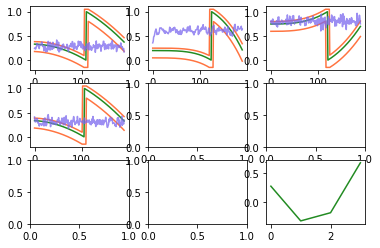

In [9]:
val_env.reset_envs_sampled()
benchmark_policy(
    trainer=bc_trainer, 
    learn_fct = bc_trainer.train, 
    val_env=val_env, 
    logname='BC trainer test large dont show steps', 
    path='/home/hendrik/Documents/master_project/LokalData/stableBaselines/', 
    n_epochs=10000, 
    n_steps=100,
    eval_epochs=50)

In [ ]:
train_env.reset_envs_sampled()

In [ ]:
rein_trainer = PPO("MlpPolicy", train_env, verbose=1, )

In [ ]:
rein_trainer.policy = bc_trainer.policy

In [ ]:
bc_trainer.policy.load_state_dict(torch.load('/home/hendrik/Documents/master_project/LokalData/test/bc_hard_100tensor(0.5380)'))
rein_model.policy = bc_trainer.policy

In [ ]:
rein_trainer = SAC("MlpPolicy", train_env, verbose=0)
rein_trainer.policy = bc_trainer.policy


In [ ]:
import gym
from stable_baselines3 import PPO
import torch
import numpy as np
from imitation.algorithms import bc
from utilsMW.dataLoaderMW import TorchDatasetMWToy

import numpy as np

from stable_baselines3.common.policies import ActorCriticPolicy

from searchTest.utils import MyEnv, ToyExpertModel, sample_expert_transitions, benchmark_policy
path_train = '/home/hendrik/Documents/master_project/LokalData/metaworld/large/train/'
path_validate = '/home/hendrik/Documents/master_project/LokalData/metaworld/large/val/'
train_data = TorchDatasetMWToy(path=path_train, device='cpu')
val_data = TorchDatasetMWToy(path=path_validate, device='cpu')
print(train_data.data.shape)
print(train_data.label.shape)
MyEnv.set_train_data(train_data, tol_neg=-0.8, tol_pos=0.8, window=31)
ToyExpertModel.set_datasets(train_data=train_data, val_data=val_data)
train_env = MyEnv()
val_env = MyEnv(data=val_data)
my_expert = ToyExpertModel(train_data=train_data, env=train_env)

In [ ]:
class LearnWrapper():
    def __init__(self, trainer):
        self.trainer = trainer
    
    def train(self, n_epochs):
        self.trainer.learn(total_timesteps=n_epochs, log_interval=140000)
            

In [ ]:
learn_wrapper = LearnWrapper(my_expert)
train_env.reset_envs_sampled()
benchmark_policy(trainer=my_expert, learn_fct = learn_wrapper.train, val_env=val_env, logname='SAC trainer test', path='/home/hendrik/Documents/master_project/LokalData/stableBaselines/', n_epochs=100, n_steps=10, eval_epochs=100)


In [ ]:
envp = gym.make("Pendulum-v1")

In [ ]:
def get_num_bits(interger):
    return int(torch.ceil(torch.log2(torch.tensor(interger))))

In [ ]:
get_num_bits(200)

In [ ]:
import gym
import numpy as np

from stable_baselines3 import SAC

env = envp

model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)
model.save("sac_pendulum")

del model # remove to demonstrate saving and loading

model = SAC.load("sac_pendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()